<h2 style="
  font-family: 'Segoe UI', sans-serif;
  font-size: 28px;
  font-weight: bold;
  text-align: center;
  background: linear-gradient(90deg, #ff6a00, #ee0979, #8e2de2, #4a00e0);
  -webkit-background-clip: text;
  -webkit-text-fill-color: transparent;
  color: transparent;
">
Análisis exploratorio y sistema de recomendación de productos en Amazon basado en reseñas y valoraciones de usuarios
</h2>

Este proyecto se basa en el análisis del conjunto de datos de ventas de Amazon, el cual contiene valoraciones y reseñas de productos listados en el sitio web oficial de Amazon. El objetivo es explorar y comprender el comportamiento de los consumidores, identificar productos destacados y desarrollar un sistema de recomendación eficiente.

<h2 style="
  font-family: 'Segoe UI', sans-serif;
  font-size: 28px;
  font-weight: bold;
  text-align: center;
  background: linear-gradient(90deg, #ff6a00, #ee0979, #8e2de2, #4a00e0);
  -webkit-background-clip: text;
  -webkit-text-fill-color: transparent;
  color: transparent;
">
Objetivo
</h2>


1. Explorar las valoraciones y reseñas.
2. Analizar el sentimiento del consumidor.
3. Desarrollar un sistema de recomendación.

<h2 style="
  font-family: 'Segoe UI', sans-serif;
  font-size: 28px;
  font-weight: bold;
  text-align: center;
  background: linear-gradient(90deg, #ff6a00, #ee0979, #8e2de2, #4a00e0);
  -webkit-background-clip: text;
  -webkit-text-fill-color: transparent;
  color: transparent;
">
  Aplicaciones
</h2>


1. **Análisis de Sentimientos**  
   Clasificación de reseñas en positivas, negativas o neutras para entender la percepción del cliente.

2. **Sistemas de Recomendación**  
   Construcción de sistemas basados en filtrado colaborativo y análisis de contenido para sugerir productos relevantes.



| Nombre de Columna     | Descripción                                                                             |
| --------------------- | --------------------------------------------------------------------------------------- |
| `product_id`          | Identificador único para cada producto listado en Amazon.                               |
| `product_name`        | Nombre del producto tal como aparece listado en Amazon.                                 |
| `category`            | Categoría o tipo de producto (por ejemplo, electrónica, ropa, etc.).                    |
| `discounted_price`    | Precio actual del producto después de aplicar cualquier descuento.                      |
| `actual_price`        | Precio original del producto antes de aplicar descuentos.                               |
| `discount_percentage` | Porcentaje de descuento aplicado al producto.                                           |
| `rating`              | Calificación promedio del producto basada en la opinión de los clientes.                |
| `rating_count`        | Número total de calificaciones recibidas por el producto.                               |
| `about_product`       | Descripción breve o aspectos destacados del producto.                                   |
| `user_id`             | Identificador único para cada usuario que dejó una reseña.                              |
| `user_name`           | Nombre mostrado del usuario que dejó la reseña.                                         |
| `review_id`           | Identificador único para cada reseña enviada por los usuarios.                          |
| `review_title`        | Título de la reseña del usuario para el producto.                                       |
| `review_content`      | Contenido completo de la reseña del usuario, detallando su experiencia con el producto. |
| `img_link`            | Enlace URL a la imagen del producto tal como se muestra en Amazon.                      |
| `product_link`        | Enlace URL a la página del listado del producto en Amazon.                              |




<h2 style="
  font-family: 'Segoe UI', sans-serif;
  font-size: 28px;
  font-weight: bold;
  text-align: center;
  background: linear-gradient(90deg, #ff6a00, #ee0979, #8e2de2, #4a00e0);
  -webkit-background-clip: text;
  -webkit-text-fill-color: transparent;
  color: transparent;
">
  Preparación y Limpieza de Datos
</h2>


#### **Preparación**

In [2]:
!pip install pandas numpy seaborn matplotlib plotly scikit-learn textblob wordcloud scipy statsmodels missingno



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd  # Para manipulación y análisis de datos estructurados (DataFrames).
import numpy as np  # Para operaciones numéricas y manejo de arreglos multidimensionales.
import seaborn as sns  # Para visualizaciones estadísticas atractivas y fáciles de interpretar.
import matplotlib.pyplot as plt  # Para crear gráficos estáticos como histogramas, barras, líneas, etc.
import plotly.express as px  # Para visualizaciones interactivas rápidas y sencillas.
import plotly.graph_objects as go  # Para visualizaciones interactivas más personalizadas y complejas.
from plotly.subplots import make_subplots  # Para combinar múltiples gráficos interactivos en una sola figura.
from sklearn.metrics.pairwise import cosine_similarity  # Para calcular similitud entre productos o usuarios (útil en sistemas de recomendación).
from textblob import TextBlob  # Para análisis de sentimientos en reseñas de texto.
from wordcloud import WordCloud  # Para generar nubes de palabras a partir de reseñas o descripciones.
from collections import Counter  # Para contar la frecuencia de palabras o elementos en listas.
import re  # Para procesamiento y limpieza de texto usando expresiones regulares.
from scipy import stats  # Para realizar pruebas estadísticas y análisis de distribución.
import statsmodels.api as sm  # Para modelos estadísticos avanzados y análisis de regresión.
from sklearn.impute import KNNImputer  # Para imputar (rellenar) valores faltantes usando el algoritmo KNN.
import missingno as msno  # Para visualizar valores faltantes en el conjunto de datos.
import warnings  # Para controlar o suprimir advertencias durante la ejecución del código.
warnings.filterwarnings('ignore')  # Ignora advertencias para mantener la salida del notebook limpia.


In [4]:
df=pd.read_csv('C:/Users/Usuario/Desktop/Proyecto 1 - Curso/amazon.csv')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [5]:
print(f"Shape: {df.shape}")
print(f"Info: {df.info()}")
print(f"Columns: {df.columns}")

Shape: (1465, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   

In [6]:
# Configurar pandas para mostrar todas las columnas del DataFrame sin truncar
pd.set_option('display.max_columns', None)

# Configurar pandas para mostrar todas las filas del DataFrame sin límite
pd.set_option('display.max_rows', None)

# Configurar pandas para que no trunque el contenido de las columnas de texto, mostrando el texto completo
pd.set_option('display.max_colwidth', None)


In [7]:
# Obtener los primeros 10 valores únicos de la columna 'discounted_price'
unique_discounted_prices = df['discounted_price'].unique()[:10]

# Imprimir los valores únicos obtenidos
print(unique_discounted_prices)

['₹399' '₹199' '₹329' '₹154' '₹149' '₹176.63' '₹229' '₹499' '₹299' '₹219']


In [8]:
# Asegurarse de que todos los valores de la columna sean tipo texto antes de hacer reemplazos
df['discounted_price'] = df['discounted_price'].astype(str).str.replace('₹', '', regex=False).str.replace(',', '', regex=False)

# Convertir los valores ya limpiados a tipo numérico
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')



In [9]:
df['discounted_price'].describe()

count     1465.000000
mean      3125.310874
std       6944.304394
min         39.000000
25%        325.000000
50%        799.000000
75%       1999.000000
max      77990.000000
Name: discounted_price, dtype: float64

In [10]:
# Eliminar el símbolo ₹ y las comas ',' de la columna 'actual_price'
# Esto es necesario para poder convertir los valores a tipo numérico
df['actual_price'] = df['actual_price'].astype(str).str.replace('₹', '', regex=False).str.replace(',', '', regex=False)

# Convertir la columna 'actual_price' (ya limpiada) a tipo numérico (float o int)
# Si algún valor no se puede convertir, se colocará como NaN gracias a errors='coerce'
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')

# Mostrar estadísticas descriptivas (mínimo, máximo, media, etc.) de la columna 'actual_price'
print("Estadísticas descriptivas de Actual Price:\n", df['actual_price'].describe())


Estadísticas descriptivas de Actual Price:
 count      1465.000000
mean       5444.990635
std       10874.826864
min          39.000000
25%         800.000000
50%        1650.000000
75%        4295.000000
max      139900.000000
Name: actual_price, dtype: float64


In [11]:
# Limpiar la columna 'discount_percentage' eliminando el símbolo '%'
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '', regex=False)

# Convertir la columna 'discount_percentage' a tipo numérico
# Si hay valores que no se pueden convertir, se reemplazan por NaN
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')

# Limpiar la columna 'rating' eliminando el carácter '|'
df['rating'] = df['rating'].str.replace('|', '', regex=False)

# Convertir la columna 'rating' a tipo numérico
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Limpiar la columna 'rating_count' eliminando las comas ',' (que separan miles)
df['rating_count'] = df['rating_count'].str.replace(',', '', regex=False)

# Convertir la columna 'rating_count' a tipo numérico
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')


In [12]:
# Calcular el porcentaje de valores faltantes (NaN) en cada columna del DataFrame
# isnull().sum() cuenta cuántos valores nulos hay por columna
# Se divide por la cantidad total de filas y se multiplica por 100 para obtener el porcentaje
missing_values = df.isnull().sum() / len(df) * 100

# Mostrar el porcentaje de valores faltantes por columna
missing_values


product_id             0.000000
product_name           0.000000
category               0.000000
discounted_price       0.000000
actual_price           0.000000
discount_percentage    0.000000
rating                 0.068259
rating_count           0.136519
about_product          0.000000
user_id                0.000000
user_name              0.000000
review_id              0.000000
review_title           0.000000
review_content         0.000000
img_link               0.000000
product_link           0.000000
dtype: float64

In [13]:
# Crear una instancia del imputador KNN (K-Nearest Neighbors)
# Este método rellenará los valores faltantes basándose en la similitud con los valores vecinos
knn_imputer = KNNImputer(n_neighbors=5)  # Puedes ajustar el número de vecinos según el contexto

# Seleccionar las columnas en las que se aplicará la imputación
columns_to_impute = ['rating', 'rating_count']

# Aplicar el imputador a las columnas seleccionadas
# Reemplazará los valores faltantes con estimaciones basadas en los vecinos más cercanos
df[columns_to_impute] = knn_imputer.fit_transform(df[columns_to_impute])

# Verificar el porcentaje de valores faltantes en la columna 'rating' después de la imputación
misisng_values_ratings_after_imputation = df['rating'].isnull().sum() / len(df) * 100

# Verificar el porcentaje de valores faltantes en la columna 'rating_count' después de la imputación
misisng_values_rating_counts_after_imputation = df['rating_count'].isnull().sum() / len(df) * 100

# Imprimir los resultados para confirmar que ya no hay valores faltantes
print("Porcentaje de valores faltantes en la columna 'rating' después de la imputación:", misisng_values_ratings_after_imputation)
print("Porcentaje de valores faltantes en la columna 'rating_count' después de la imputación:", misisng_values_rating_counts_after_imputation)

Porcentaje de valores faltantes en la columna 'rating' después de la imputación: 0.0
Porcentaje de valores faltantes en la columna 'rating_count' después de la imputación: 0.0


In [14]:
# Verificar si existen filas duplicadas en el DataFrame
print("¿Existen duplicados en el dataset?: ", df.duplicated().any())

# Contar cuántas filas duplicadas hay en el DataFrame
print("Número total de filas duplicadas en el dataset: ", df.duplicated().sum())


¿Existen duplicados en el dataset?:  False
Número total de filas duplicadas en el dataset:  0


In [15]:
# Crear una nueva columna 'price_range' clasificando los precios descontados en rangos específicos
df['price_range'] = pd.cut(
    df['discounted_price'],
    bins=[30.0, 100.0, 500.0, 1000.0, 5000.0, 10000.0, 77990.0],  # Definición de los rangos de precio
    labels=['30-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000+']  # Etiquetas para cada rango
)

# Agrupar los datos por rango de precio y calcular:
# - la calificación media (mean_rating)
# - la cantidad de productos únicos (product_count)
# - el promedio de conteo de valoraciones (average_rating_count)
price_rating_analysis = df.groupby('price_range').agg(
    mean_rating=('rating', 'mean'),
    product_count=('product_id', 'nunique'),
    average_rating_count=('rating_count', 'mean')
).reset_index()

# Mostrar el análisis de calificaciones por rango de precio
price_rating_analysis


,price_range,mean_rating,product_count,average_rating_count
0,30-100,4.064444,40,7440.977778
1,100-500,4.075330,461,17813.723164
2,500-1000,4.117063,237,21177.813492
3,1000-5000,4.077355,410,18257.164733
4,5000-10000,4.141667,84,21546.571429
5,10000+,4.195082,119,16143.188525


####


<h2 style="
  font-family: 'Segoe UI', sans-serif;
  font-size: 28px;
  font-weight: bold;
  text-align: center;
  background: linear-gradient(90deg, #ff6a00, #ee0979, #8e2de2, #4a00e0);
  -webkit-background-clip: text;
  -webkit-text-fill-color: transparent;
  color: transparent;
">
  EDA
</h2>


#### **Análisis Exploratorio**

In [17]:
# Identificar los productos con la mejor calificación (rating) en cada categoría
top_products_by_category = df.loc[df.groupby('category')['rating'].idxmax()]

# Seleccionar las columnas relevantes para mostrar
top_products_by_category = top_products_by_category[['category', 'product_id', 'product_name', 'rating']]

# Mostrar los primeros 3 productos destacados por categoría
top_10_products_by_category = top_products_by_category.head(3)

# Mostrar el resultado
top_10_products_by_category


,category,product_id,product_name,rating
1157,Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,B0912WJ87V,"Reffair AX30 [MAX] Portable Air Purifier for Car, Home & Office | Smart Ionizer Function | H13 Grade True HEPA Filter [Internationally Tested] Aromabuds Fragrance Option - Black",3.8
695,Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,B097C564GC,"rts [2 Pack] Mini USB C Type C Adapter Plug, Type C Female to USB A Male Charger Charging Cable Adapter Converter compatible for iPhone, Samsung S20 ultra/S21/S10/S8/S9/MacBook Pro iPad Silver",4.3
906,Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,B009LJ2BXA,"Hp Wired On Ear Headphones With Mic With 3.5 Mm Drivers, In-Built Noise Cancelling, Foldable And Adjustable For Laptop/Pc/Office/Home/ 1 Year Warranty (B4B09Pa)",3.5


**Visualización de los Productos Mejor Calificados en Cada Categoría**


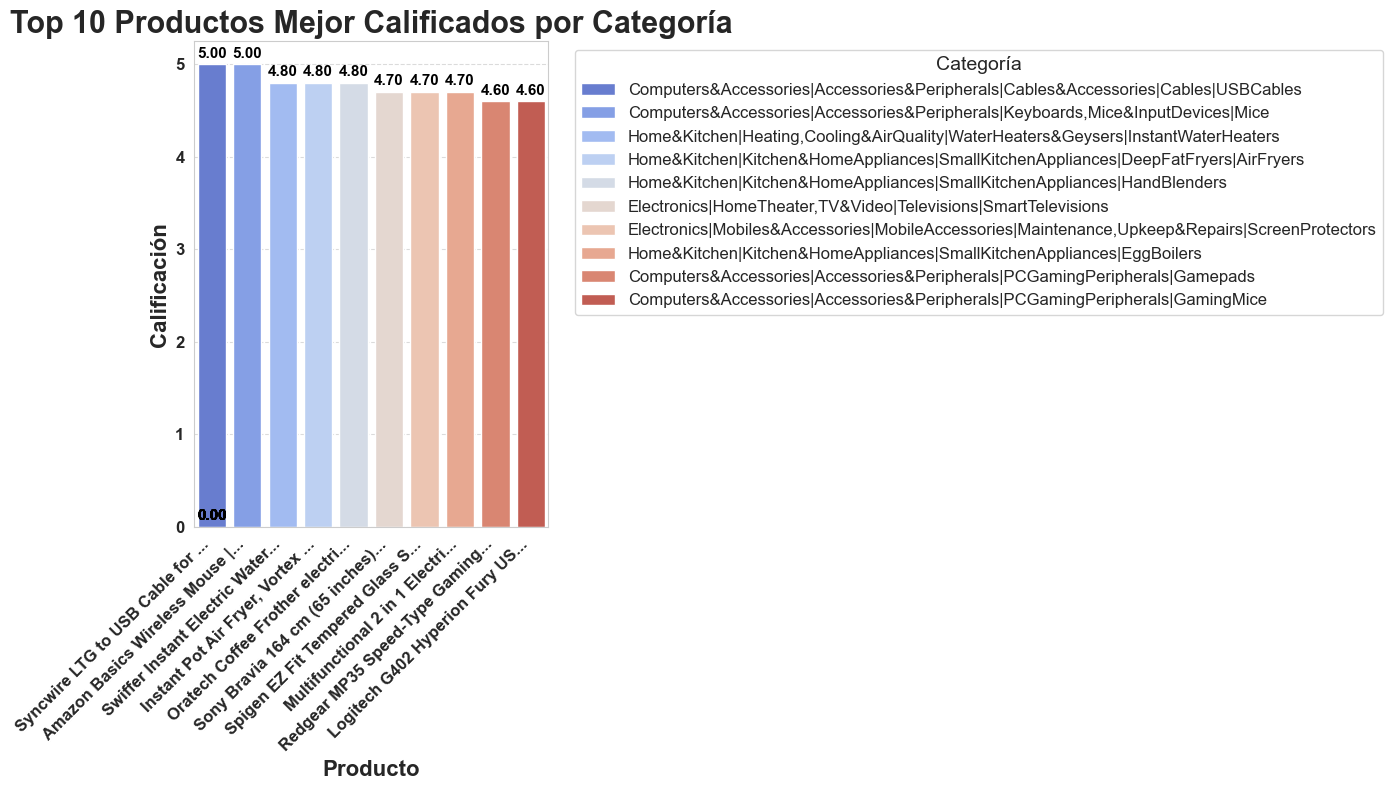

In [28]:
# Identificar el producto con mayor calificación por categoría
top_products_by_category = df.loc[df.groupby('category')['rating'].idxmax().dropna()]

# Seleccionar columnas relevantes
top_products_by_category = top_products_by_category[['category', 'product_id', 'product_name', 'rating']]

# Seleccionar los 10 productos con mayor calificación
top_10_products = top_products_by_category.nlargest(10, 'rating').copy()

# Ordenar por calificación para mejor visualización
top_10_products_sorted = top_10_products.sort_values(by='rating', ascending=False).copy()

# Abreviar nombres de productos largos
top_10_products_sorted['short_product_name'] = top_10_products_sorted['product_name'].apply(
    lambda x: x[:30] + '...' if len(x) > 30 else x
)

# Crear el gráfico de barras
plt.figure(figsize=(14, 8))
sns.set_style('whitegrid')

barplot = sns.barplot(
    data=top_10_products_sorted,
    x='short_product_name',
    y='rating',
    hue='category',
    dodge=False,
    palette='coolwarm'
)

# Título y etiquetas
plt.title('Top 10 Productos Mejor Calificados por Categoría', fontsize=22, fontweight='bold')
plt.xlabel('Producto', fontsize=16, fontweight='bold')
plt.ylabel('Calificación', fontsize=16, fontweight='bold')

# Ajuste de etiquetas del eje x
plt.xticks(rotation=45, ha='right', fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Leyenda
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

# Etiquetas encima de cada barra
for bar in barplot.patches:
    height = bar.get_height()
    barplot.annotate(
        f'{height:.2f}',
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 5),
        textcoords='offset points',
        ha='center',
        fontsize=11,
        fontweight='bold',
        color='black'
    )

# Mostrar solo la rejilla horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Acomodar el diseño final
plt.tight_layout()
plt.show()


**Mostrar los Productos con Menor Calificación por Categoría**


In [ ]:
# Paso 1: Encontrar la calificación mínima para cada categoría
least_products_by_category = df.loc[df.groupby('category')['rating'].idxmin()]

# Paso 2: Seleccionar las columnas relevantes
least_products_by_category = least_products_by_category[['category', 'product_id', 'product_name', 'rating']]

# Paso 3: Ordenar por calificación y seleccionar los 10 productos con menor calificación
least_10_products = least_products_by_category.nsmallest(10, 'rating')

# Paso 4: Ordenar los resultados por categoría para una mejor visualización
least_10_products_sorted = least_10_products.sort_values(by='category')

# Mostrar el resultado
least_10_products_sorted


,category,product_id,product_name,rating
282,Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,B0B94JPY2N,"Amazon Brand - Solimo 65W Fast Charging Braided Type C to C Data Cable | Suitable For All Supported Mobile Phones (1 Meter, Black)",3.0
263,"Electronics|HomeTheater,TV&Video|Accessories|RemoteControls",B09F6D21BY,7SEVEN Compatible LG TV Remote Suitable for LG Non Magic Smart tv Remote Control (Mouse & Voice Non-Support) MR20GA Prime Video and Netflix Hotkeys,3.0
545,Electronics|WearableTechnology|SmartWatches,B0BBVKRP7B,SHREENOVA ID116 Plus Bluetooth Fitness Smart Watch for Men Women and Kids Activity Tracker (Black),2.8
1309,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHeaters|FanHeaters",B0BPJBTB3F,Khaitan ORFin Fan heater for Home and kitchen-K0 2215,2.0
1251,Home&Kitchen|Kitchen&HomeAppliances|SewingMachines&Accessories|Sewing&EmbroideryMachines,B08XLR6DSB,"akiara - Makes life easy Electric Handy Sewing/Stitch Handheld Cordless Portable White Sewing Machine for Home Tailoring, Hand Machine | Mini Silai | White Hand Machine with Adapter",3.1
1243,Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|HandBlenders,B0BFBNXS94,"Personal Size Blender, Portable Blender, Battery Powered USB Blender, with Four Blades, Mini Blender Travel Bottle for Juice, Shakes, and Smoothies (Pink)",2.3
1286,Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|JuicerMixerGrinders,B0BNDGL26T,"MR. BRAND Portable USB Juicer Electric USB Juice Maker Mixer Bottle Blender Grinder Mixer,6 Blades Rechargeable Bottle with (Multi color) (MULTI MIXER 6 BLED)",2.8
1314,Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|Juicers,B08TT63N58,"ROYAL STEP - AMAZON'S BRAND - Portable Electric USB Juice Maker Juicer Bottle Blender Grinder Mixer,4 Blades Rechargeable Bottle with (Multi color) (MULTI)",3.1
1356,Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|VacuumSealers,B0B7L86YCB,Green Tales Heat Seal Mini Food Sealer-Impulse Machine for Sealing Plastic Bags Packaging,2.6
1449,Home&Kitchen|Kitchen&HomeAppliances|WaterPurifiers&Accessories|WaterPurifierAccessories,B0BBLHTRM9,IONIX Tap filter Multilayer | Activated Carbon Faucet Water Filters Universal Interface Home Kitchen Faucet Tap Water Clean Purifier Filter Cartridge Five Layer Water Filter-Pack of 1,2.9


**Productos Mejor Calificados**

In [ ]:
# Identificar los productos con la calificación más alta en general
top_rated_products = df.sort_values(by='rating', ascending=False).head(10)

# Seleccionar columnas relevantes para mostrar
top_rated_products = top_rated_products[['category', 'product_id', 'product_name', 'rating']]

# Mostrar los 10 productos mejor calificados
top_rated_products

,category,product_id,product_name,rating
775,"Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice",B09ZHCJDP1,"Amazon Basics Wireless Mouse | 2.4 GHz Connection, 1600 DPI | Type - C Adapter | Upto 12 Months of Battery Life | Ambidextrous Design | Suitable for PC/Mac/Laptop",5.0
174,Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,B0BP7XLX48,"Syncwire LTG to USB Cable for Fast Charging Compatible with Phone 5/ 5C/ 5S/ 6/ 6S/ 7/8/ X/XR/XS Max/ 11/12/ 13 Series and Pad Air/Mini, Pod & Other Devices (1.1 Meter, White)",5.0
324,Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple MFi Certified] Lightning to Type C Fast Charging Cord Compatible with iPhone 14/13/13 pro/Max/12/11/X/XS/XR/8, Supports Power Delivery - White",5.0
1299,Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|DeepFatFryers|AirFryers,B0B53DS4TF,"Instant Pot Air Fryer, Vortex 2QT, Touch Control Panel, 360° EvenCrisp™ Technology, Uses 95 % less Oil, 4-in-1 Appliance: Air Fry, Roast, Bake, Reheat (Vortex 1.97Litre, Black)",4.8
1145,"Home&Kitchen|Heating,Cooling&AirQuality|WaterHeaters&Geysers|InstantWaterHeaters",B0BR4F878Q,"Swiffer Instant Electric Water Heater Faucet Tap Home-Kitchen Instantaneous Water Heater Tank less for Tap, LED Electric Head Water Heaters Tail Gallon Comfort(3000W) ((Pack of 1))",4.8
1201,Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|HandBlenders,B0BQ3K23Y1,"Oratech Coffee Frother electric, milk frother electric, coffee beater, cappuccino maker, Coffee Foamer, Mocktail Mixer, Coffee Foam Maker, coffee whisker electric, Froth Maker, coffee stirrers electric, coffee frothers, Coffee Blender, (6 Month Warranty) (Multicolour)",4.8
1388,"Home&Kitchen|Heating,Cooling&AirQuality|WaterHeaters&Geysers|InstantWaterHeaters",B0BP89YBC1,Campfire Spring Chef Prolix Instant Portable Water Heater Geyser 1Ltr. for Use Home Stainless Steel Baking Rack | Restaurant | Office | Labs | Clinics | Saloon | with Installation Kit (With MCB),4.7
1223,Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|HandBlenders,B0BM4KTNL1,"FIGMENT Handheld Milk Frother Rechargeable, 3-Speed Electric Frother for Coffee with 2 Whisks and Coffee Decoration Tool, Coffee Frother Mixer, CRESCENT ENTERPRISES VRW0.50BK (A1)",4.7
1275,Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|EggBoilers,B0BM9H2NY9,Multifunctional 2 in 1 Electric Egg Boiling Steamer Egg Frying Pan Egg Boiler Electric Automatic Off with Egg Boiler Machine Non-Stick Electric Egg Frying Pan-Tiger Woods (Multy),4.7
1226,Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|HandBlenders,B0BLC2BYPX,"Zuvexa USB Rechargeable Electric Foam Maker - Handheld Milk Wand Mixer Frother for Hot Milk, Hand Blender Coffee, Egg Beater (Black)",4.7


**Productos Mejor Calificados**

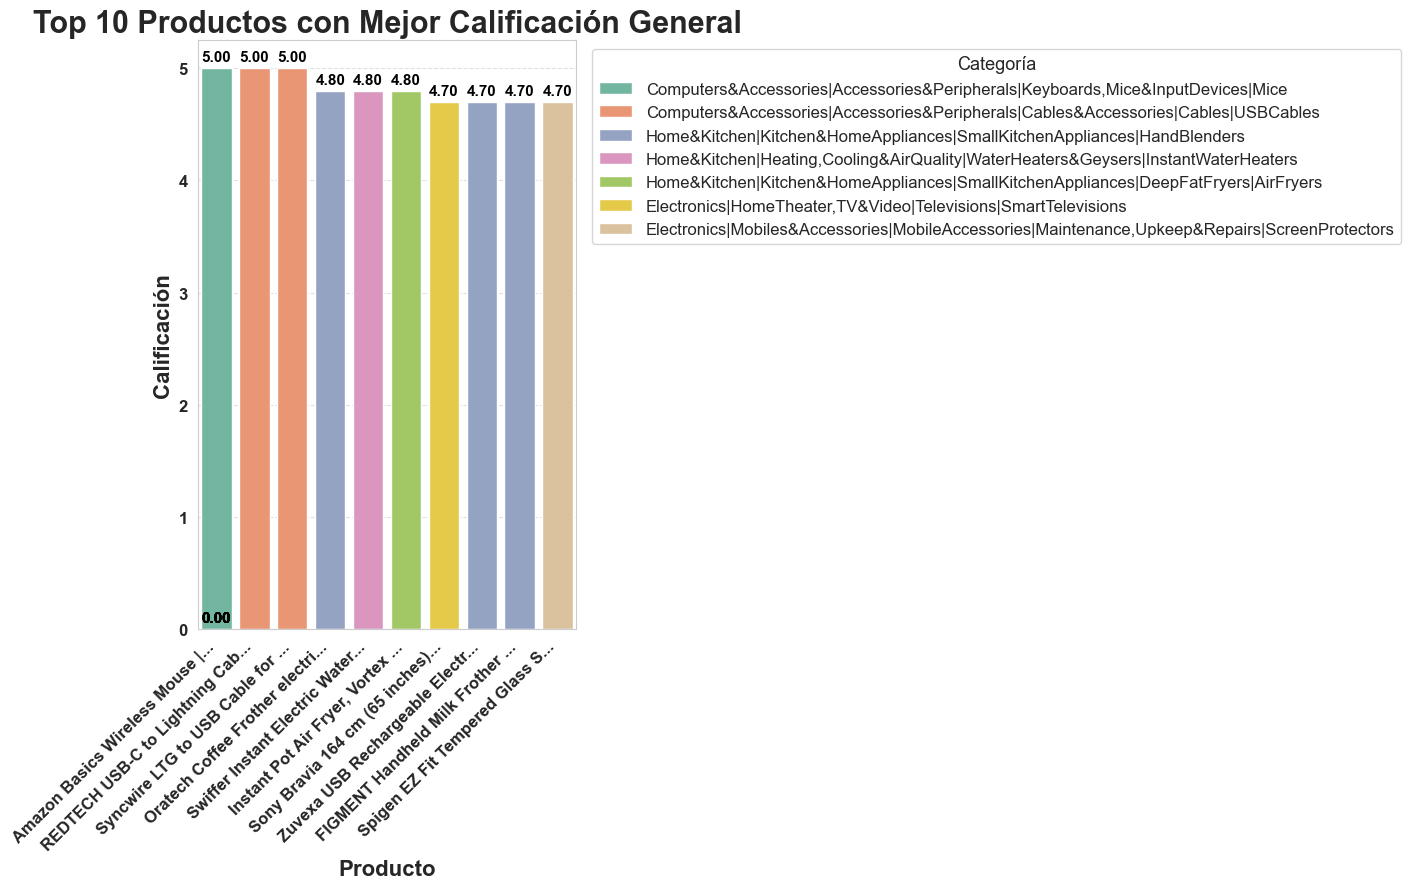

In [31]:
# Configurar estilo
sns.set_style("whitegrid")

# Seleccionar los 10 productos con mayor calificación
top_rated_products = df.sort_values(by='rating', ascending=False).head(10).copy()

# Columnas relevantes
top_rated_products = top_rated_products[['category', 'product_id', 'product_name', 'rating']]

# Abreviar nombres largos
MAX_NAME_LENGTH = 30
top_rated_products['short_product_name'] = top_rated_products['product_name'].apply(
    lambda x: x[:MAX_NAME_LENGTH] + '...' if len(x) > MAX_NAME_LENGTH else x
)

# Paleta de colores amigable
unique_categories = top_rated_products['category'].unique()
palette = sns.color_palette("Set2", len(unique_categories))
category_color_map = dict(zip(unique_categories, palette))

# Configurar tamaño de figura
plt.figure(figsize=(14, 9))

# Crear gráfico de barras vertical
barplot = sns.barplot(
    data=top_rated_products,
    x='short_product_name',
    y='rating',
    hue='category',
    dodge=False,
    palette=category_color_map
)

# Título y etiquetas
plt.title('Top 10 Productos con Mejor Calificación General', fontsize=22, fontweight='bold')
plt.xlabel('Producto', fontsize=16, fontweight='bold')
plt.ylabel('Calificación', fontsize=16, fontweight='bold')

# Ajustar etiquetas del eje x
plt.xticks(rotation=45, ha='right', fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Leyenda
plt.legend(title='Categoría', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=12, title_fontsize=13)

# Etiquetas numéricas encima de las barras
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(
        f'{height:.2f}',
        xy=(p.get_x() + p.get_width() / 2, height),
        xytext=(0, 5),
        textcoords='offset points',
        ha='center',
        fontsize=11,
        fontweight='bold',
        color='black'
    )

# Cuadrícula solo en eje y
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Ajustar layout
plt.tight_layout()
plt.show()

**Calificación Media según Rangos de Precio con Descuento**

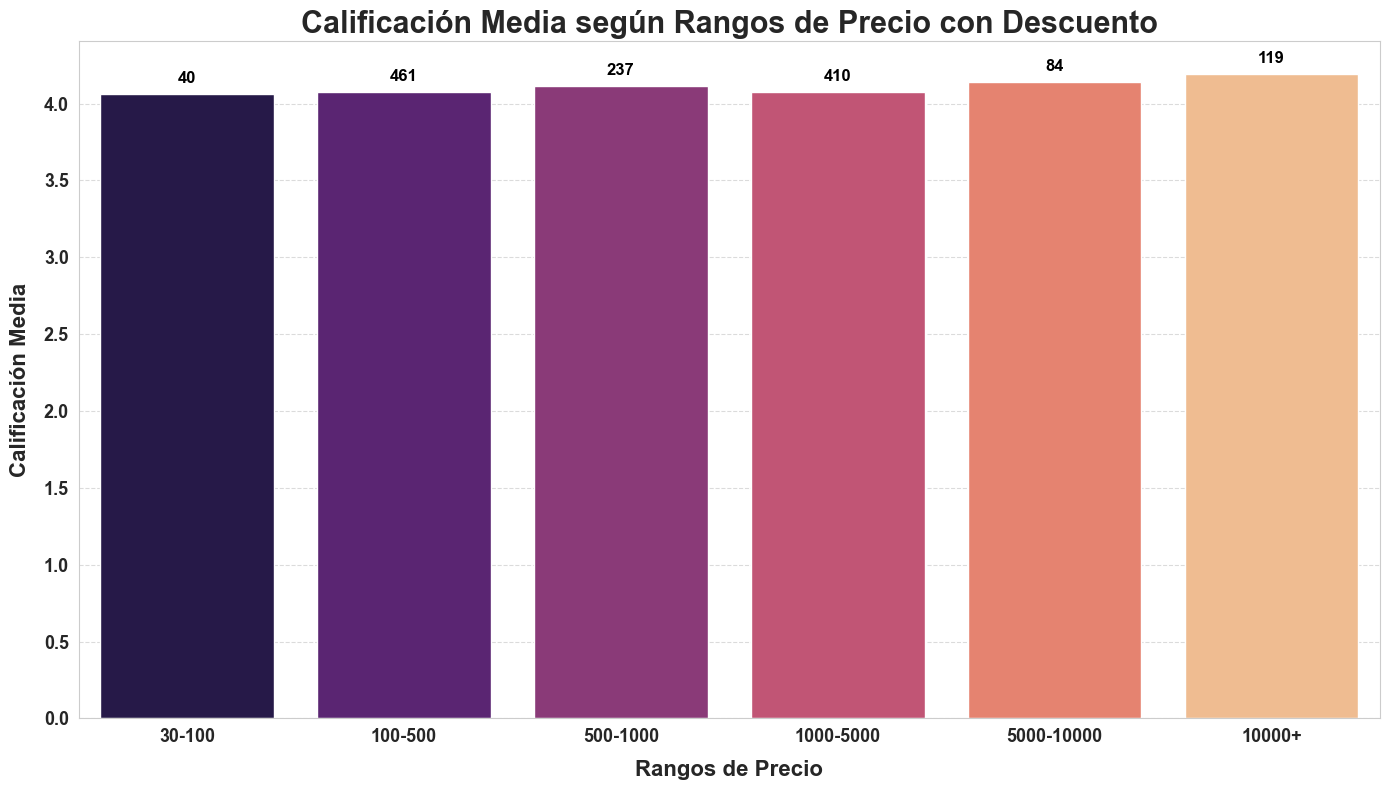

In [32]:
# Configurar estilo general
sns.set_style("whitegrid")

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(14, 8))

# Definir colores personalizados con la paleta 'magma'
colors = sns.color_palette('magma', len(price_rating_analysis))

# Crear gráfico de barras
bar_plot = sns.barplot(
    data=price_rating_analysis,
    x='price_range',
    y='mean_rating',
    palette=colors,
    capsize=0.1,
    ax=ax
)

# Añadir etiquetas de conteo encima de cada barra
for index, row in price_rating_analysis.iterrows():
    ax.text(
        index, row['mean_rating'] + 0.05,
        f"{row['product_count']}",
        ha='center', va='bottom',
        fontsize=12, fontweight='bold', color='black'
    )

# Configurar título y ejes
ax.set_title('Calificación Media según Rangos de Precio con Descuento', fontsize=22, fontweight='bold')
ax.set_xlabel('Rangos de Precio', fontsize=16, fontweight='bold', labelpad=10)
ax.set_ylabel('Calificación Media', fontsize=16, fontweight='bold', labelpad=10)

# Personalizar ticks
ax.set_xticklabels(ax.get_xticklabels(), fontsize=13, fontweight='bold', rotation=0)
ax.set_yticklabels(ax.get_yticks(), fontsize=13, fontweight='bold')

# Añadir rejilla horizontal
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Eliminar la leyenda si el eje x ya identifica los rangos de precio
# Si aún deseas mostrarla, descomenta la siguiente sección:

# legend_labels = price_rating_analysis['price_range'].tolist()
# handles = [Patch(color=color, label=label) for color, label in zip(colors, legend_labels)]
# ax.legend(handles=handles, title='Rangos de Precio', fontsize=12, title_fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))

# Ajustar el layout final
plt.tight_layout()
plt.show()

**Calculo de Reseñas y Calificaciones por Producto**

In [31]:
# Crear un nuevo DataFrame para el análisis por categoría
category_product_counts = df.groupby('category').agg(
    product_count=('product_id', 'nunique'),  # Número de productos únicos por categoría
    total_reviews=('review_id', 'count'),     # Total de reseñas por categoría
    mean_rating=('rating', 'mean')             # Calificación media por categoría
).reset_index()

# Calcular la proporción de reseñas por producto
category_product_counts['reviews_per_product'] = category_product_counts['total_reviews'] / category_product_counts['product_count']

# Mostrar el análisis ordenado por la calificación media (de mayor a menor)
category_product_counts.sort_values(by='mean_rating', ascending=False, inplace=True)

# Filtrar las 10 categorías con mayor cantidad de productos
top_categories = category_product_counts.nlargest(10, 'product_count')

# Mostrar las 10 categorías principales ordenadas por total de reseñas (de mayor a menor)
top_categories.sort_values(by='total_reviews', ascending=False)


,category,product_count,total_reviews,mean_rating,reviews_per_product
10,Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,161,233,4.151931,1.447205
119,Electronics|WearableTechnology|SmartWatches,62,76,4.025000,1.225806
117,Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones,68,68,4.100000,1.000000
97,"Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions",60,63,4.209524,1.050000
76,"Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear",51,52,3.898077,1.019608
93,"Electronics|HomeTheater,TV&Video|Accessories|RemoteControls",49,49,3.800000,1.000000
169,Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|MixerGrinders,27,27,4.011111,1.000000
18,"Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice",24,24,4.287500,1.000000
181,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cleaning&Ironing|Irons,Steamers&Accessories|Irons|DryIrons",24,24,4.129167,1.000000
140,"Home&Kitchen|Heating,Cooling&AirQuality|WaterHeaters&Geysers|InstantWaterHeaters",23,23,4.052174,1.000000


**Principales Productos por Porcentaje de Calificación**

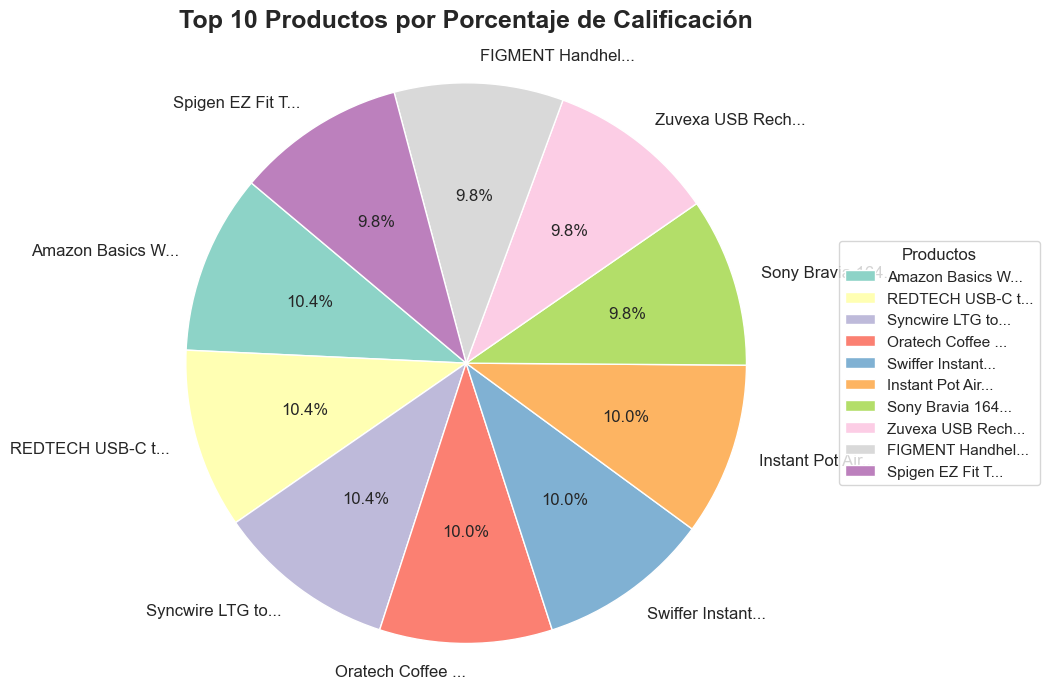

In [33]:
# Calcular el porcentaje de calificación
df['rating_percentage'] = (df['rating'] / 5) * 100

# Seleccionar los 10 productos con mayor porcentaje de calificación
top_products = df[['product_id', 'product_name', 'category', 'rating_percentage']] \
                .sort_values(by='rating_percentage', ascending=False) \
                .head(10).copy()

# Crear etiquetas abreviadas para visualización
MAX_LABEL_LENGTH = 15
top_products['label'] = top_products['product_name'].apply(
    lambda x: x[:MAX_LABEL_LENGTH] + '...' if len(x) > MAX_LABEL_LENGTH else x
)

# Definir colores agradables para el gráfico
colors = sns.color_palette("Set3", len(top_products))

# Crear gráfico circular
fig, ax = plt.subplots(figsize=(10, 7))
wedges, texts, autotexts = ax.pie(
    top_products['rating_percentage'],
    labels=top_products['label'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1},
    textprops={'fontsize': 12}
)

# Título estético
ax.set_title('Top 10 Productos por Porcentaje de Calificación', fontsize=18, fontweight='bold', pad=20)

# Asegurar que el gráfico sea perfectamente circular
ax.axis('equal')

# Añadir leyenda al lado
ax.legend(wedges, top_products['label'], title='Productos', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=11, title_fontsize=12)

# Ajustar layout para evitar corte de elementos
plt.tight_layout()
plt.show()

**Productos y categorías con mayor porcentaje de calificación**

In [33]:
# Calcular el porcentaje de calificación
df['rating_percentage'] = (df['rating'] / 5) * 100

# Mostrar el DataFrame actualizado con la nueva columna
df[['product_id', 'product_name', 'category', 'rating', 'rating_percentage']].head()


,product_id,product_name,category,rating,rating_percentage
0,B07JW9H4J1,"Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,4.2,84.0
1,B098NS6PVG,"Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,4.0,80.0
2,B096MSW6CT,"Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,3.9,78.0
3,B08HDJ86NZ,"boAt Deuce USB 300 2 in 1 Type-C & Micro USB Stress Resistant, Tangle-Free, Sturdy Cable with 3A Fast Charging & 480mbps Data Transmission, 10000+ Bends Lifespan and Extended 1.5m Length(Martian Red)",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,4.2,84.0
4,B08CF3B7N1,"Portronics Konnect L 1.2M Fast Charging 3A 8 Pin USB Cable with Charge & Sync Function for iPhone, iPad (Grey)",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,4.2,84.0


**Principales categorías del conjunto de datos**

In [34]:
# 1. Contar el número de productos en cada categoría
category_counts = df['category'].value_counts()

# 2. Encontrar las 10 categorías con mayor cantidad de productos
top_10_categories = category_counts.nlargest(10)

# 3. Filtrar el DataFrame para incluir solo productos de estas 10 categorías principales
top_10_category_products = df[df['category'].isin(top_10_categories.index)]

# Mostrar los resultados
top_10_categories


,count
category,
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,233
Electronics|WearableTechnology|SmartWatches,76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones,68
"Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions",63
"Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear",52
"Electronics|HomeTheater,TV&Video|Accessories|RemoteControls",49
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|MixerGrinders,27
"Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice",24
"Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables",24


**Principales categorías por número de productos**

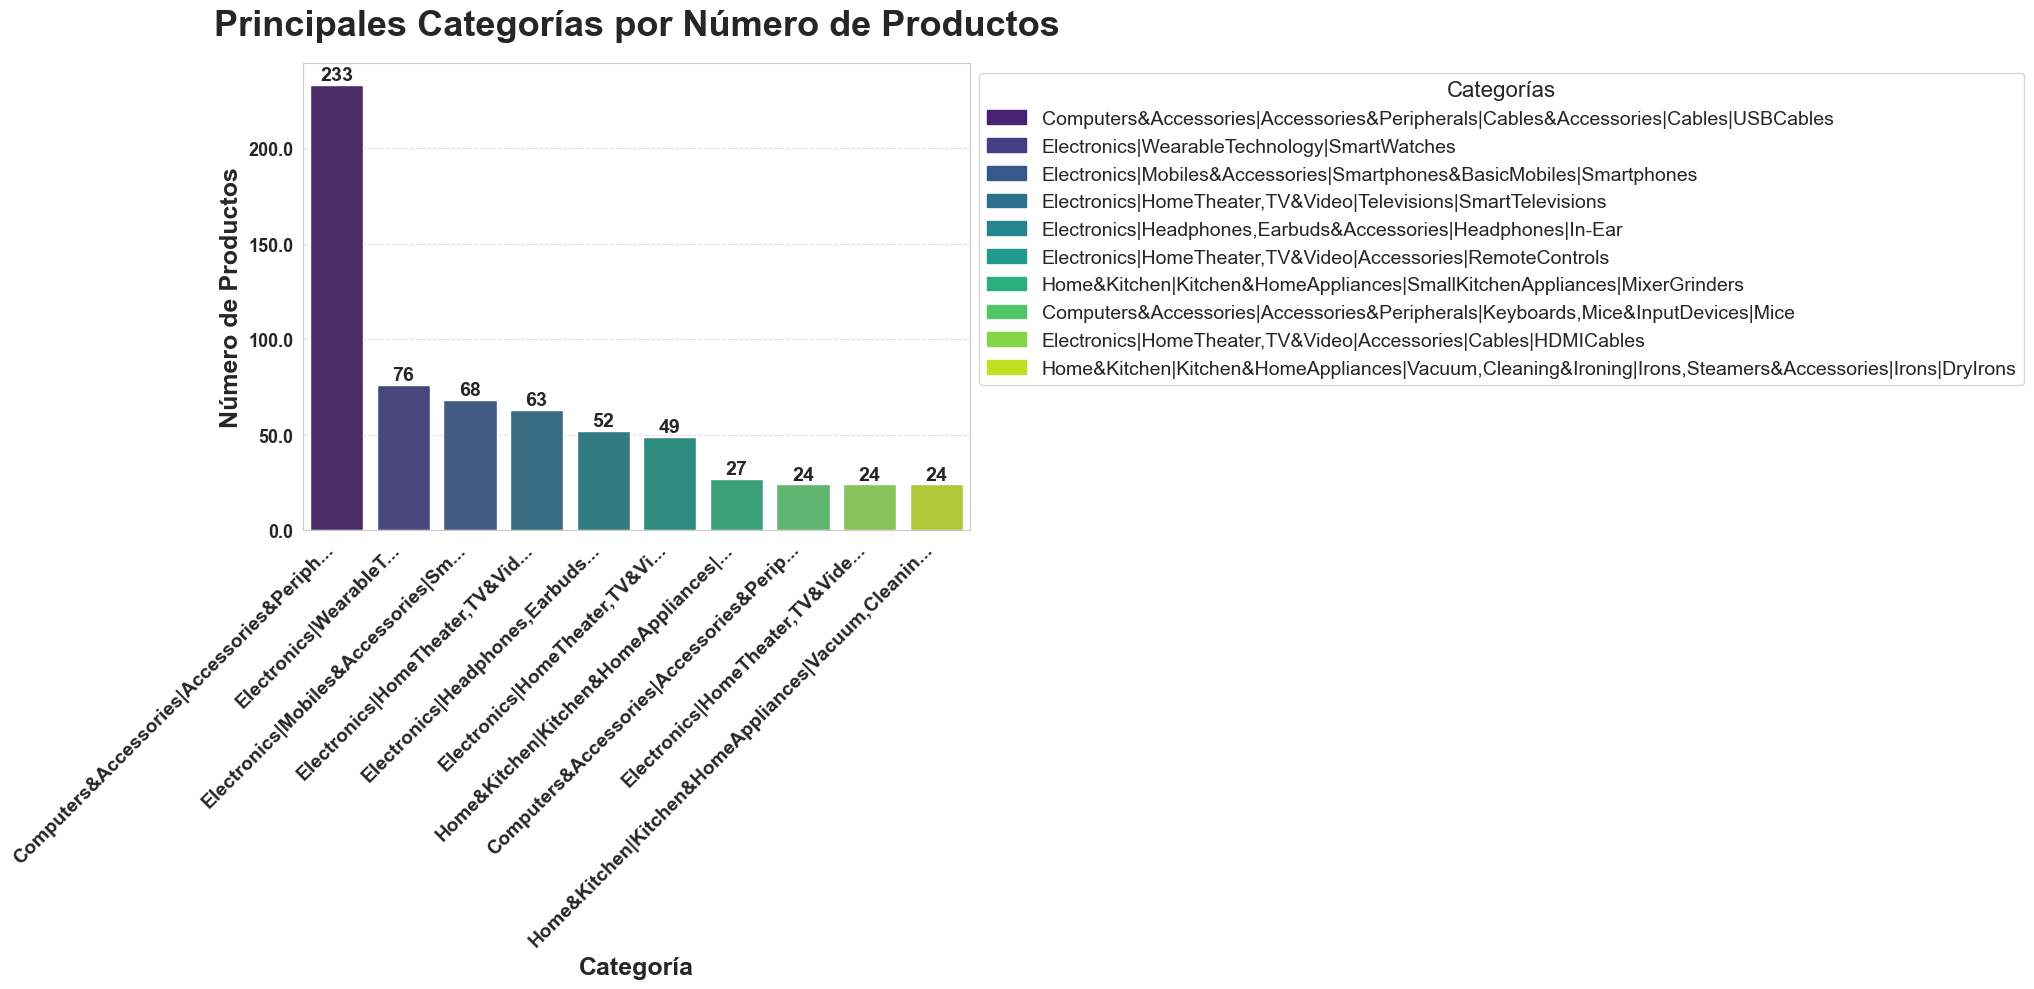

In [37]:
# 1. Agrupar y contar productos por categoría
top_10_categories = df['category'].value_counts().head(10)

# 2. Función para acortar los nombres de las categorías
def shorten_name(name):
    return name[:len(name)//2] + '...' if len(name) > 10 else name

# 3. Aplicar acortamiento
shortened_categories = [shorten_name(category) for category in top_10_categories.index]

# 4. Crear paleta de colores
colors = sns.color_palette('viridis', len(top_10_categories))

# 5. Crear la figura y gráfico
fig, ax = plt.subplots(figsize=(20, 10))

barplot = sns.barplot(
    x=shortened_categories,
    y=top_10_categories.values,
    palette=colors,
    ax=ax
)

# 6. Etiquetas y título
ax.set_title('Principales Categorías por Número de Productos', fontsize=26, fontweight='bold', pad=20)
ax.set_xlabel('Categoría', fontsize=18, fontweight='bold')
ax.set_ylabel('Número de Productos', fontsize=18, fontweight='bold')

# 7. Etiquetas de valor en cada barra
for i, value in enumerate(top_10_categories.values):
    ax.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=14, fontweight='bold')

# 8. Estética de los ejes
ax.set_xticklabels(shortened_categories, rotation=45, ha='right', fontsize=14, fontweight='bold')
ax.set_yticklabels(ax.get_yticks(), fontsize=13, fontweight='bold')

# 9. Rejilla horizontal
ax.grid(axis='y', linestyle='--', alpha=0.6)

# 10. Leyenda con nombres completos
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(len(shortened_categories))]
ax.legend(
    handles, top_10_categories.index,
    title='Categorías',
    loc='upper left',
    bbox_to_anchor=(1, 1),
    fontsize=14,
    title_fontsize=16
)

# 11. Ajustar layout final
plt.tight_layout()
plt.show()

**Calificaciones promedio por categoría**

In [36]:
# Agrupar los datos por categoría y calcular métricas relevantes
category_summary = df.groupby('category').agg(
    product_count=('product_id', 'count'),      # Total de productos por categoría
    average_rating=('rating', 'mean')           # Calificación promedio por categoría
).reset_index()  # Restablecer el índice para convertirlo en un DataFrame normal

# Ordenar las categorías según la cantidad de productos (de mayor a menor) y seleccionar las 10 principales
top_categories = category_summary.sort_values(by='product_count', ascending=False).head(10)

# Mostrar las categorías con más productos y sus calificaciones promedio
top_categories


,category,product_count,average_rating
10,Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,233,4.151931
119,Electronics|WearableTechnology|SmartWatches,76,4.025000
117,Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones,68,4.100000
97,"Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions",63,4.209524
76,"Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear",52,3.898077
93,"Electronics|HomeTheater,TV&Video|Accessories|RemoteControls",49,3.800000
169,Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|MixerGrinders,27,4.011111
89,"Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables",24,4.254167
181,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cleaning&Ironing|Irons,Steamers&Accessories|Irons|DryIrons",24,4.129167
18,"Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice",24,4.287500


**Top 10 Categorías por Calificación Promedio**

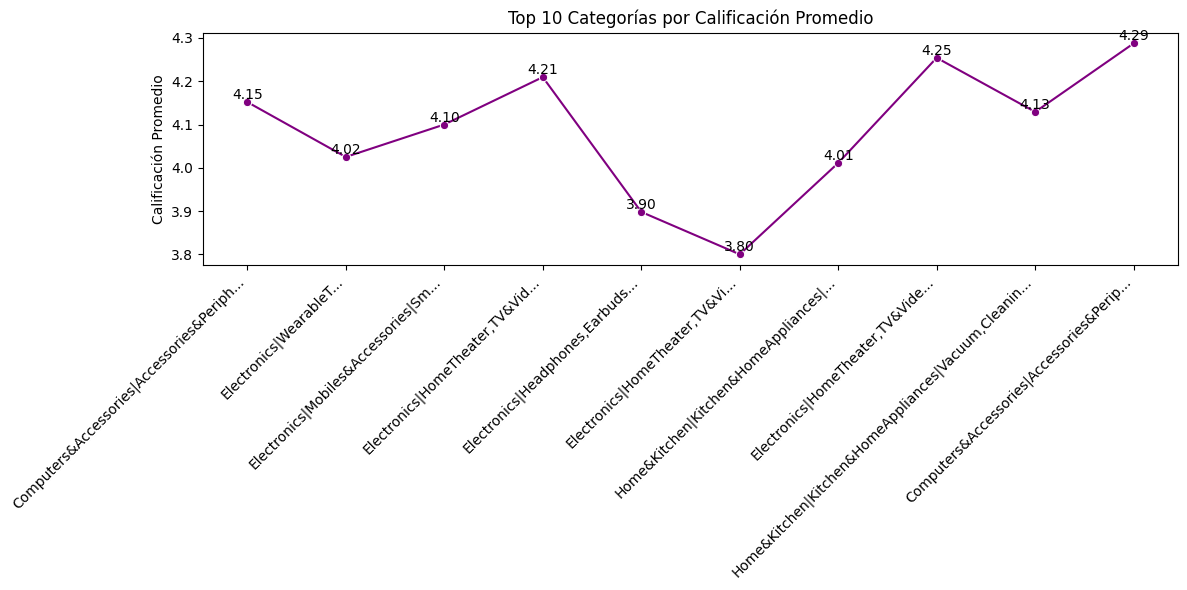

In [37]:
# Agrupar por categoría y calcular el número de productos y la calificación promedio
category_summary = df.groupby('category').agg(
    product_count=('product_id', 'count'),      # Contar cuántos productos hay en cada categoría
    average_rating=('rating', 'mean')           # Calcular la calificación promedio por categoría
).reset_index()

# Ordenar el resumen por número de productos en orden descendente y seleccionar las 10 principales categorías
top_categories = category_summary.sort_values(by='product_count', ascending=False).head(10)

# Acortar los nombres de las categorías (tomando la mitad del texto seguido de "...")
shortened_categories = [f"{cat[:len(cat)//2]}..." for cat in top_categories['category']]

# Crear un gráfico de líneas para mostrar las calificaciones promedio
plt.figure(figsize=(12, 6))
line_plot = sns.lineplot(x=shortened_categories, y='average_rating', data=top_categories, marker='o', color='purple')

# Añadir etiquetas con los valores de calificación en cada punto
for index, value in enumerate(top_categories['average_rating']):
    line_plot.text(index, value, f'{value:.2f}', color='black', ha='center', va='bottom')

# Definir etiquetas y título del gráfico
plt.ylabel('Calificación Promedio', color='black')
plt.title('Top 10 Categorías por Calificación Promedio')
plt.xticks(rotation=45, ha='right')

# Ajustar el diseño para que todo se vea correctamente
plt.tight_layout()
plt.show()


**Precio con Descuento y el Precio Original vs Porcentaje de Descuento**

In [104]:
# Crear figura con 2 scatterplots lado a lado y títulos claros
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Descuento % vs Precio con Descuento", "Descuento % vs Precio Original"),
    horizontal_spacing=0.12
)

# Categorías únicas ordenadas (para consistencia en colores y leyenda)
categories = sorted(df['category'].unique())

# Paleta 'magma' convertida a formato rgba para Plotly con opacidad 0.75
palette = sns.color_palette("magma", len(categories))
color_map = {
    cat: f'rgba({int(r*255)}, {int(g*255)}, {int(b*255)}, 0.75)'
    for cat, (r,g,b) in zip(categories, palette)
}

# Función para abreviar nombres largos, max 12 chars + '...'
def abbreviate(cat):
    return (cat[:12] + '...') if len(cat) > 12 else cat

# Agregar scatter plots para cada categoría en ambas columnas
for col, y_col, y_label in [(1, 'discounted_price', 'Precio con Descuento'), (2, 'actual_price', 'Precio Original')]:
    for category in categories:
        cat_data = df[df['category'] == category]
        fig.add_trace(
            go.Scatter(
                x=cat_data['discount_percentage'],
                y=cat_data[y_col],
                mode='markers',
                marker=dict(color=color_map[category], size=9, line=dict(width=0.5, color='DarkSlateGrey')),
                name=abbreviate(category),
                legendgroup=category,
                showlegend=(col == 1),  # Mostrar leyenda solo en el primer gráfico para evitar repetición
                hovertemplate=(
                    f"<b>Categoría:</b> {category}<br>"
                    f"<b>% Descuento:</b> %{{x:.2f}}<br>"
                    f"<b>{y_label}:</b> ₹{{y:,.0f}}<br>"
                    "<extra></extra>"
                ),
            ),
            row=1, col=col
        )

# Layout y estética
fig.update_layout(
    title="Análisis de Precios y Descuentos por Categoría",
    height=600,
    width=1100,
    legend_title_text="Categorías",
    legend=dict(
        bgcolor='rgba(255,255,255,0.8)',
        bordercolor='Black',
        borderwidth=1,
        orientation="v",
        yanchor="top",
        y=0.95,
        xanchor="left",
        x=1.02,
        font=dict(size=11)
    ),
    hovermode="closest",
    margin=dict(l=50, r=150, t=70, b=50)
)

# Ejes X idénticos en ambos para facilitar comparación
fig.update_xaxes(title_text="Porcentaje de Descuento", range=[df['discount_percentage'].min(), df['discount_percentage'].max()], row=1, col=1)
fig.update_xaxes(title_text="Porcentaje de Descuento", range=[df['discount_percentage'].min(), df['discount_percentage'].max()], row=1, col=2)

# Ejes Y con formato moneda y títulos
fig.update_yaxes(title_text="Precio con Descuento (₹)", tickformat=",.0f", row=1, col=1)
fig.update_yaxes(title_text="Precio Original (₹)", tickformat=",.0f", row=1, col=2)

fig.show()

**Análisis Descriptivo del Precio y la Calificación**

In [39]:
# 1. Estadísticas descriptivas
print("Estadísticas descriptivas:")
print(df[['actual_price', 'discounted_price', 'rating']].describe())

# 2. Análisis de correlación
correlation_actual = df['actual_price'].corr(df['rating'])
correlation_discounted = df['discounted_price'].corr(df['rating'])

print("\nCorrelación entre el precio original y la calificación:", correlation_actual)
print("Correlación entre el precio con descuento y la calificación:", correlation_discounted)


Estadísticas descriptivas:
        actual_price  discounted_price       rating
count    1465.000000       1465.000000  1465.000000
mean     5444.990635       3125.310874     4.096546
std     10874.826864       6944.304394     0.291578
min        39.000000         39.000000     2.000000
25%       800.000000        325.000000     4.000000
50%      1650.000000        799.000000     4.100000
75%      4295.000000       1999.000000     4.300000
max    139900.000000      77990.000000     5.000000

Correlación entre el precio original y la calificación: 0.12167297075671898
Correlación entre el precio con descuento y la calificación: 0.12035456289817405


**Calificación promedio según el precio original y el precio con descuento**

In [40]:
# Definir rangos de precio para el precio original (actual_price)
price_bins_actual = [30.0, 100.0, 500.0, 1000.0, 5000.0, 10000.0, 139900.0]
price_labels_actual = ['30-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000+']
df['actual_price_group'] = pd.cut(df['actual_price'], bins=price_bins_actual, labels=price_labels_actual)

# Calcular el rating promedio para cada grupo de precio original
average_rating_actual = df.groupby('actual_price_group')['rating'].mean().reset_index()
average_rating_actual.columns = ['Grupo de Precio Original', 'Calificación Promedio']

# Ordenar los grupos por calificación promedio de mayor a menor y quedarse con los 10 primeros
average_rating_actual = average_rating_actual.sort_values(by='Calificación Promedio', ascending=False).head(10)

# Definir rangos de precio para el precio con descuento (discounted_price)
price_bins_discounted = [30.0, 100.0, 500.0, 1000.0, 5000.0, 10000.0, 77990.0]
price_labels_discounted = ['30-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000+']
df['discounted_price_group'] = pd.cut(df['discounted_price'], bins=price_bins_discounted, labels=price_labels_discounted)

# Calcular el rating promedio para cada grupo de precio con descuento
average_rating_discounted = df.groupby('discounted_price_group')['rating'].mean().reset_index()
average_rating_discounted.columns = ['Grupo de Precio con Descuento', 'Calificación Promedio']

# Filtrar para mantener solo los grupos que tienen nombre (no nulos)
average_rating_discounted = average_rating_discounted[average_rating_discounted['Grupo de Precio con Descuento'].notnull()]

# Mostrar los resultados
print("\nCalificación Promedio por Grupo de Precio Original:")
print(average_rating_actual)

print("\nCalificación Promedio por Grupo de Precio con Descuento:")
print(average_rating_discounted)



Calificación Promedio por Grupo de Precio Original:
  Grupo de Precio Original  Calificación Promedio
5                   10000+               4.178836
0                   30-100               4.121429
2                 500-1000               4.090031
3                1000-5000               4.087131
4               5000-10000               4.074242
1                  100-500               4.071359

Calificación Promedio por Grupo de Precio con Descuento:
  Grupo de Precio con Descuento  Calificación Promedio
0                        30-100               4.064444
1                       100-500               4.075330
2                      500-1000               4.117063
3                     1000-5000               4.077355
4                    5000-10000               4.141667
5                        10000+               4.195082


**Visualización de la Calificación Promedio según el Precio Original y con Descuento**

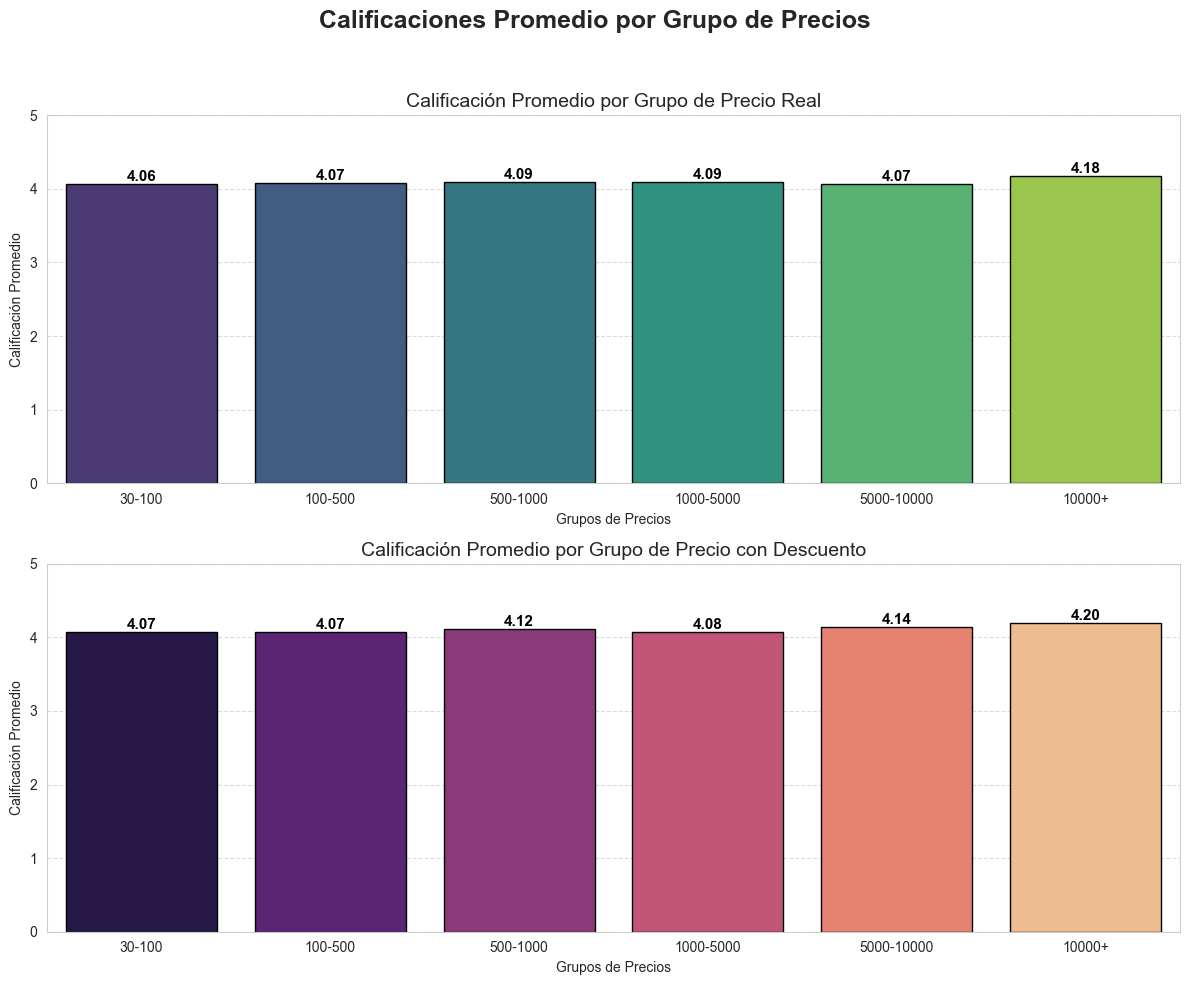

In [103]:
# Definir rangos y etiquetas para precios reales
actual_price_bins = [30, 100, 500, 1000, 5000, 10000, float('inf')]
actual_price_labels = ['30-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000+']
df['actual_price_group'] = pd.cut(df['actual_price'], bins=actual_price_bins, labels=actual_price_labels, right=False)

# Calcular promedio de calificaciones por grupo de precio real
average_rating_actual = (
    df.groupby('actual_price_group')['rating']
    .mean()
    .reset_index()
    .rename(columns={'actual_price_group': 'Grupo de Precio Real', 'rating': 'Calificación Promedio'})
)

# Definir rangos y etiquetas para precios con descuento
discounted_price_bins = [30, 100, 500, 1000, 5000, 10000, float('inf')]
discounted_price_labels = ['30-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000+']
df['discounted_price_group'] = pd.cut(df['discounted_price'], bins=discounted_price_bins, labels=discounted_price_labels, right=False)

# Calcular promedio de calificaciones por grupo de precio con descuento
average_rating_discounted = (
    df.groupby('discounted_price_group')['rating']
    .mean()
    .reset_index()
    .rename(columns={'discounted_price_group': 'Grupo de Precio con Descuento', 'rating': 'Calificación Promedio'})
)

# Filtrar grupos no nulos
average_rating_actual = average_rating_actual.dropna()
average_rating_discounted = average_rating_discounted.dropna()

# Configurar figura y subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=False)
fig.suptitle('Calificaciones Promedio por Grupo de Precios', fontsize=18, fontweight='bold')

# Plot para precios reales
bar_actual = sns.barplot(
    ax=axes[0],
    x='Grupo de Precio Real',
    y='Calificación Promedio',
    data=average_rating_actual,
    palette='viridis',
    edgecolor='black'
)
axes[0].set_title('Calificación Promedio por Grupo de Precio Real', fontsize=14)
axes[0].set_ylabel('Calificación Promedio')
axes[0].set_ylim(0, 5)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Etiquetas sobre barras (precios reales)
for p in bar_actual.patches:
    height = p.get_height()
    axes[0].annotate(
        f'{height:.2f}',
        (p.get_x() + p.get_width() / 2, height),
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold',
        color='black'
    )

# Plot para precios con descuento
bar_discounted = sns.barplot(
    ax=axes[1],
    x='Grupo de Precio con Descuento',
    y='Calificación Promedio',
    data=average_rating_discounted,
    palette='magma',
    edgecolor='black'
)
axes[1].set_title('Calificación Promedio por Grupo de Precio con Descuento', fontsize=14)
axes[1].set_ylabel('Calificación Promedio')
axes[1].set_ylim(0, 5)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Etiquetas sobre barras (precios con descuento)
for p in bar_discounted.patches:
    height = p.get_height()
    axes[1].annotate(
        f'{height:.2f}',
        (p.get_x() + p.get_width() / 2, height),
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold',
        color='black'
    )

# Ajustes finales
for ax in axes:
    ax.set_xlabel('Grupos de Precios')
    ax.set_ylim(0, 5)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Visualización del Efecto del Precio Original y con Descuento sobre las Calificaciones**

In [102]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Crear subgráficos (subplots)
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('Precio Real vs Calificación', 'Precio con Descuento vs Calificación'),
    horizontal_spacing=0.15
)

# Definir colores con opacidad para mejor visual
actual_price_color = 'rgba(75, 0, 130, 0.7)'       # Púrpura oscuro semitransparente
discounted_price_color = 'rgba(255, 20, 147, 0.7)' # Rosa oscuro semitransparente

# Scatter Precio Real vs Calificación
fig.add_trace(
    go.Scatter(
        x=df['actual_price'],
        y=df['rating'],
        mode='markers',
        marker=dict(size=10, color=actual_price_color, line=dict(width=1, color='DarkSlateGrey')),
        name='Precio Real',
        hovertemplate='Precio Real: %{x:$,.2f}<br>Calificación: %{y}<extra></extra>'
    ),
    row=1, col=1
)

# Scatter Precio con Descuento vs Calificación
fig.add_trace(
    go.Scatter(
        x=df['discounted_price'],
        y=df['rating'],
        mode='markers',
        marker=dict(size=10, color=discounted_price_color, line=dict(width=1, color='DarkSlateGrey')),
        name='Precio con Descuento',
        hovertemplate='Precio con Desc.: %{x:$,.2f}<br>Calificación: %{y}<extra></extra>'
    ),
    row=1, col=2
)

# Actualizar diseño general
fig.update_layout(
    title_text='Efecto del Precio Real y con Descuento en las Calificaciones',
    title_font=dict(size=22, family='Arial Black'),
    height=500,
    width=1000,
    showlegend=True,
    legend_title_text='Tipo de Precio',
    legend=dict(x=0.5, y=1.1, orientation='h', xanchor='center'),
    margin=dict(t=100, b=50, l=70, r=70)
)

# Formato de ejes X: sin notación científica y con separadores de miles
fig.update_xaxes(
    tickformat=',.0f',
    title_text='Precio Real ($)',
    row=1, col=1
)
fig.update_xaxes(
    tickformat=',.0f',
    title_text='Precio con Descuento ($)',
    row=1, col=2
)

# Títulos ejes Y
fig.update_yaxes(title_text='Calificación', row=1, col=1)
fig.update_yaxes(title_text='Calificación', row=1, col=2)

fig.show()


**Mostrar los Productos con Mayor Calificación Promedio**

In [43]:
# Paso 1: Agrupar por product_id y calcular la calificación promedio
avg_ratings = df.groupby('product_id')['rating'].mean()

# Paso 2: Ordenar las calificaciones promedio de forma descendente y obtener las 10 mejores
top_10_avg_ratings = avg_ratings.nlargest(10)

# Paso 3: Obtener los nombres de productos correspondientes a esos product_id
top_10_products = df[df['product_id'].isin(top_10_avg_ratings.index)]

# Paso 4: Crear un DataFrame para mostrarlo más fácilmente
top_10_product_info = top_10_products[['product_id', 'product_name']].drop_duplicates().set_index('product_id')
top_10_product_info['average_rating'] = top_10_avg_ratings.values

# Mostrar los resultados con texto específico
print("Top 10 Productos con Mayor Calificación Promedio:")
for product_id, row in top_10_product_info.iterrows():
    print(f"ID del Producto: {product_id} - Nombre del Producto: {row['product_name']} - Calificación Promedio: {row['average_rating']:.1f}")

# Imprimir IDs de productos y sus calificaciones promedio por separado
print("\nIDs de Productos y sus Calificaciones Promedio:")
for product_id in top_10_product_info.index:
    avg_rating = top_10_product_info.loc[product_id, 'average_rating']
    print(f"ID del Producto: {product_id} - Calificación Promedio: {avg_rating:.1f}")


Top 10 Productos con Mayor Calificación Promedio:
ID del Producto: B0BP7XLX48 - Nombre del Producto: Syncwire LTG to USB Cable for Fast Charging Compatible with Phone 5/ 5C/ 5S/ 6/ 6S/ 7/8/ X/XR/XS Max/ 11/12/ 13 Series and Pad Air/Mini, Pod & Other Devices (1.1 Meter, White) - Calificación Promedio: 5.0
ID del Producto: B09WN3SRC7 - Nombre del Producto: Sony Bravia 164 cm (65 inches) 4K Ultra HD Smart LED Google TV KD-65X74K (Black) - Calificación Promedio: 5.0
ID del Producto: B0BQRJ3C47 - Nombre del Producto: REDTECH USB-C to Lightning Cable 3.3FT, [Apple MFi Certified] Lightning to Type C Fast Charging Cord Compatible with iPhone 14/13/13 pro/Max/12/11/X/XS/XR/8, Supports Power Delivery - White - Calificación Promedio: 5.0
ID del Producto: B0B23LW7NV - Nombre del Producto: Spigen EZ Fit Tempered Glass Screen Protector for iPhone 14 Pro Max - 2 Pack (Sensor Protection) - Calificación Promedio: 4.8
ID del Producto: B09ZHCJDP1 - Nombre del Producto: Amazon Basics Wireless Mouse | 2.4 

**Productos con Menor Calificación Promedio**

In [44]:
# Paso 1: Agrupar por product_id y calcular la calificación promedio
avg_ratings = df.groupby('product_id')['rating'].mean()

# Paso 2: Ordenar las calificaciones promedio de forma ascendente y obtener las 10 más bajas
least_10_avg_ratings = avg_ratings.nsmallest(10)

# Paso 3: Obtener los nombres de productos correspondientes a esos product_id
least_10_products = df[df['product_id'].isin(least_10_avg_ratings.index)]

# Paso 4: Crear un DataFrame para mostrarlo más fácilmente
least_10_product_info = least_10_products[['product_id', 'product_name']].drop_duplicates().set_index('product_id')
least_10_product_info['average_rating'] = least_10_avg_ratings.values

# Mostrar los resultados con texto específico
print("10 Productos con Menor Calificación Promedio:")
for product_id, row in least_10_product_info.iterrows():
    print(f"ID del Producto: {product_id} - Nombre del Producto: {row['product_name']} - Calificación Promedio: {row['average_rating']:.1f}")

# Imprimir IDs de productos y sus calificaciones promedio por separado
print("\nIDs de Productos y sus Calificaciones Promedio:")
for product_id in least_10_product_info.index:
    avg_rating = least_10_product_info.loc[product_id, 'average_rating']
    print(f"ID del Producto: {product_id} - Calificación Promedio: {avg_rating:.1f}")


10 Productos con Menor Calificación Promedio:
ID del Producto: B09F6D21BY - Nombre del Producto: 7SEVEN Compatible LG TV Remote Suitable for LG Non Magic Smart tv Remote Control (Mouse & Voice Non-Support) MR20GA Prime Video and Netflix Hotkeys - Calificación Promedio: 2.0
ID del Producto: B0B94JPY2N - Nombre del Producto: Amazon Brand - Solimo 65W Fast Charging Braided Type C to C Data Cable | Suitable For All Supported Mobile Phones (1 Meter, Black) - Calificación Promedio: 2.3
ID del Producto: B0BBVKRP7B - Nombre del Producto: SHREENOVA ID116 Plus Bluetooth Fitness Smart Watch for Men Women and Kids Activity Tracker (Black) - Calificación Promedio: 2.6
ID del Producto: B0B82YGCF6 - Nombre del Producto: Tokdis MX-1 Pro Bluetooth Calling Smartwatch - 1.69” LCD Display, Multiple Watch Faces, Sleep Monitor, Heart & SpO2 Monitoring, Multiple Sports Modes, Water Resistant - Calificación Promedio: 2.8
ID del Producto: B0BFBNXS94 - Nombre del Producto: Personal Size Blender, Portable Blende

**Mostrar los Productos con Menor Calificación Promedio**

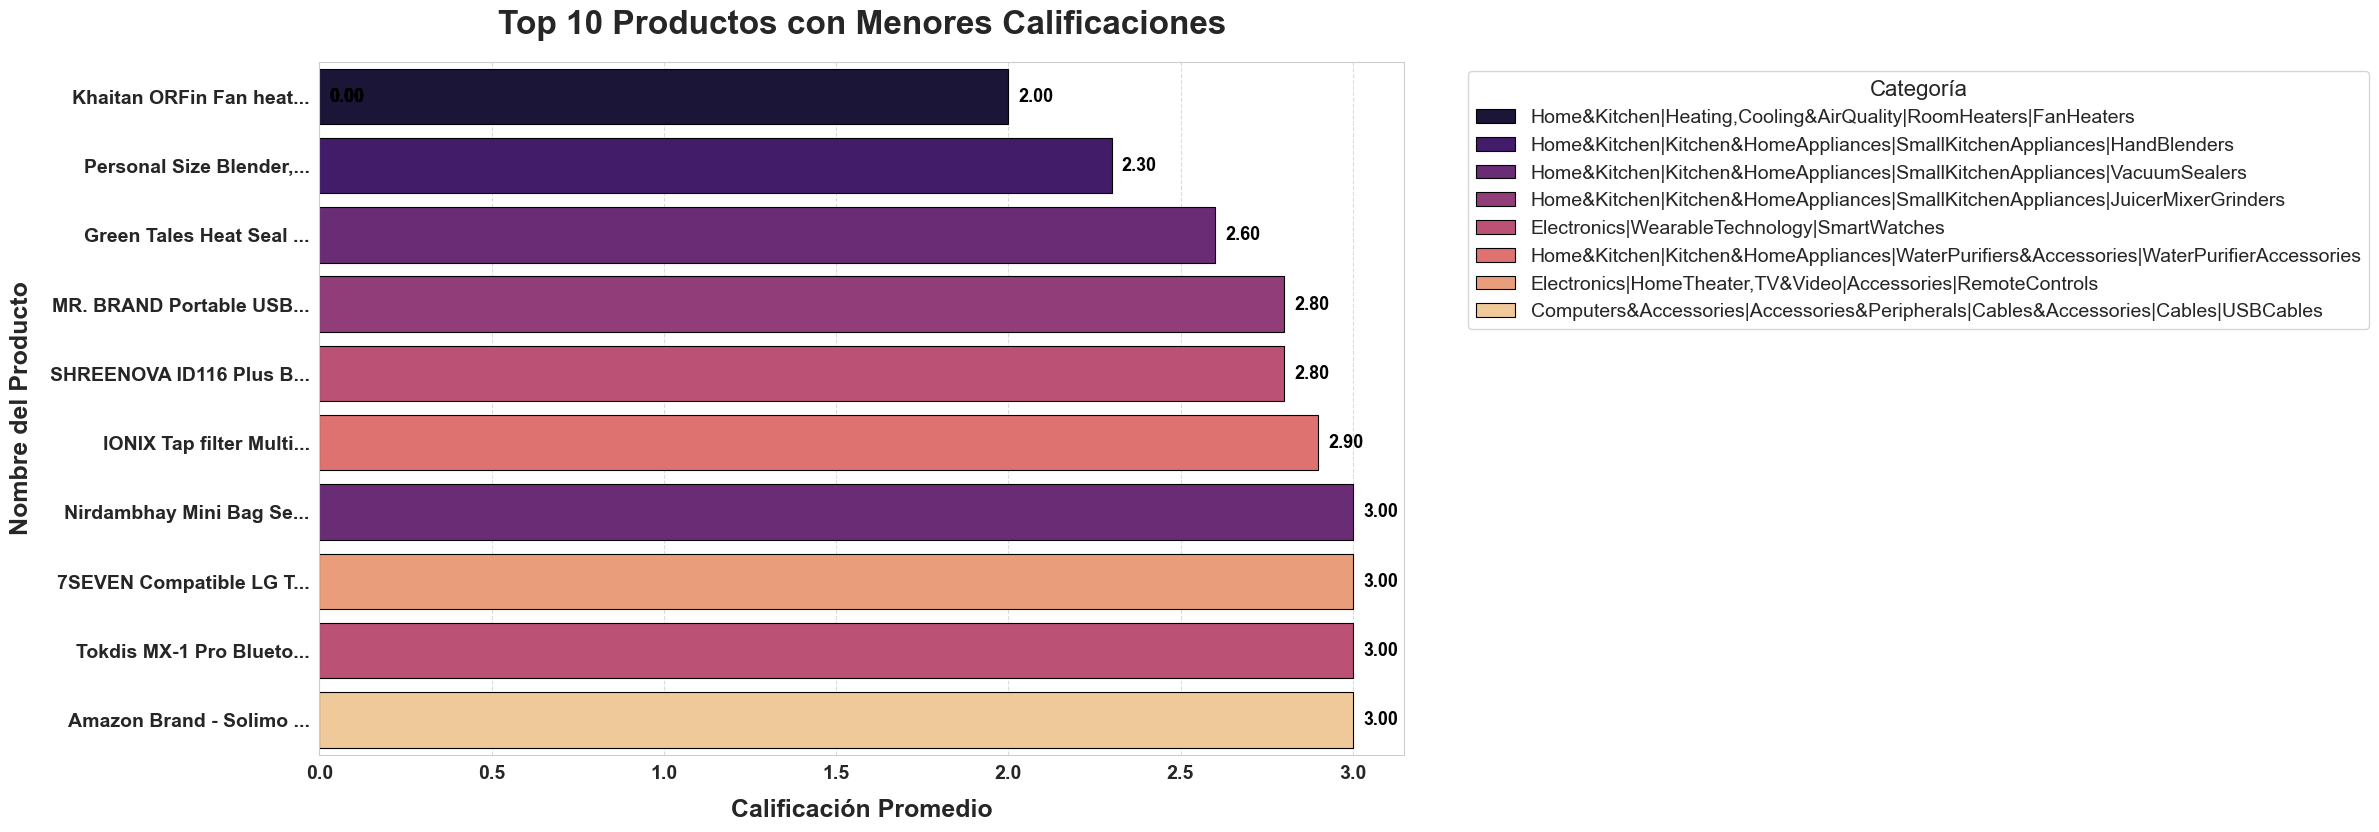

In [105]:
# Copiar para no modificar el df original y evitar SettingWithCopyWarning
least_rated_products = df.sort_values(by='rating').head(10).copy()

# Columnas relevantes
least_rated_products = least_rated_products[['category', 'product_id', 'product_name', 'rating']]

# Abreviar nombres largos de producto (máximo 25 caracteres)
least_rated_products['short_product_name'] = least_rated_products['product_name'].apply(
    lambda x: x if len(x) <= 25 else x[:22] + '...'
)

# Paleta de colores basada en categorías
unique_categories = least_rated_products['category'].unique()
palette = sns.color_palette("magma", len(unique_categories))
category_color_map = dict(zip(unique_categories, palette))

# Configurar figura vertical más alta y delgada
plt.figure(figsize=(14, 9))

# Gráfico de barras horizontal con colores según categoría, sin separación (dodge=False)
barplot = sns.barplot(
    data=least_rated_products,
    y='short_product_name',
    x='rating',
    hue='category',
    dodge=False,
    palette=category_color_map,
    edgecolor='black',
    linewidth=0.8
)

# Títulos y etiquetas con tipografía clara y profesional
plt.title('Top 10 Productos con Menores Calificaciones', fontsize=24, fontweight='bold', pad=20)
plt.xlabel('Calificación Promedio', fontsize=18, fontweight='bold', labelpad=12)
plt.ylabel('Nombre del Producto', fontsize=18, fontweight='bold', labelpad=12)

# Leyenda a la derecha con título y tamaño adecuado
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14, title_fontsize=16)

# Etiquetas del eje X y Y con tamaño legible y negrita
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')

# Anotar valores de calificación al final de cada barra, con ligera separación
for p in barplot.patches:
    width = p.get_width()
    y = p.get_y() + p.get_height() / 2
    barplot.annotate(
        f'{width:.2f}',
        (width + 0.03, y),
        ha='left', va='center',
        fontsize=13, fontweight='bold',
        color='black'
    )

# Cuadrícula solo horizontal para facilitar lectura de valores
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Ajuste automático para que no se corte nada y que la leyenda quede visible
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

#### **Análisis de Correlación**

In [47]:
# Seleccionar columnas numéricas para el análisis de correlación
numerical_columns = [
    'discounted_price',      # Precio con descuento
    'actual_price',          # Precio original
    'discount_percentage',   # Porcentaje de descuento
    'rating',                # Calificación
    'rating_count'           # Cantidad de calificaciones
]

# Calcular la matriz de correlación
correlation_matrix = df[numerical_columns].corr(method='pearson')  # También puedes usar 'kendall' o 'spearman'

# Mostrar la matriz de correlación
print("\nMatriz de Correlación:")
correlation_matrix



Matriz de Correlación:


,discounted_price,actual_price,discount_percentage,rating,rating_count
discounted_price,1.000000,0.961915,-0.242412,0.120355,-0.027095
actual_price,0.961915,1.000000,-0.118098,0.121673,-0.035974
discount_percentage,-0.242412,-0.118098,1.000000,-0.155065,0.011127
rating,0.120355,0.121673,-0.155065,1.000000,0.102148
rating_count,-0.027095,-0.035974,0.011127,0.102148,1.000000


In [46]:
# Seleccionar columnas numéricas para el análisis de correlación
numerical_cols = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']
correlation_matrix = df[numerical_cols].corr()

# Imprimir la matriz de correlación
print("\nMatriz de Correlación:")
correlation_matrix



Matriz de Correlación:


,discounted_price,actual_price,discount_percentage,rating,rating_count
discounted_price,1.000000,0.961915,-0.242412,0.120355,-0.027095
actual_price,0.961915,1.000000,-0.118098,0.121673,-0.035974
discount_percentage,-0.242412,-0.118098,1.000000,-0.155065,0.011127
rating,0.120355,0.121673,-0.155065,1.000000,0.102148
rating_count,-0.027095,-0.035974,0.011127,0.102148,1.000000


**Mapa de Calor de Correlaciones**

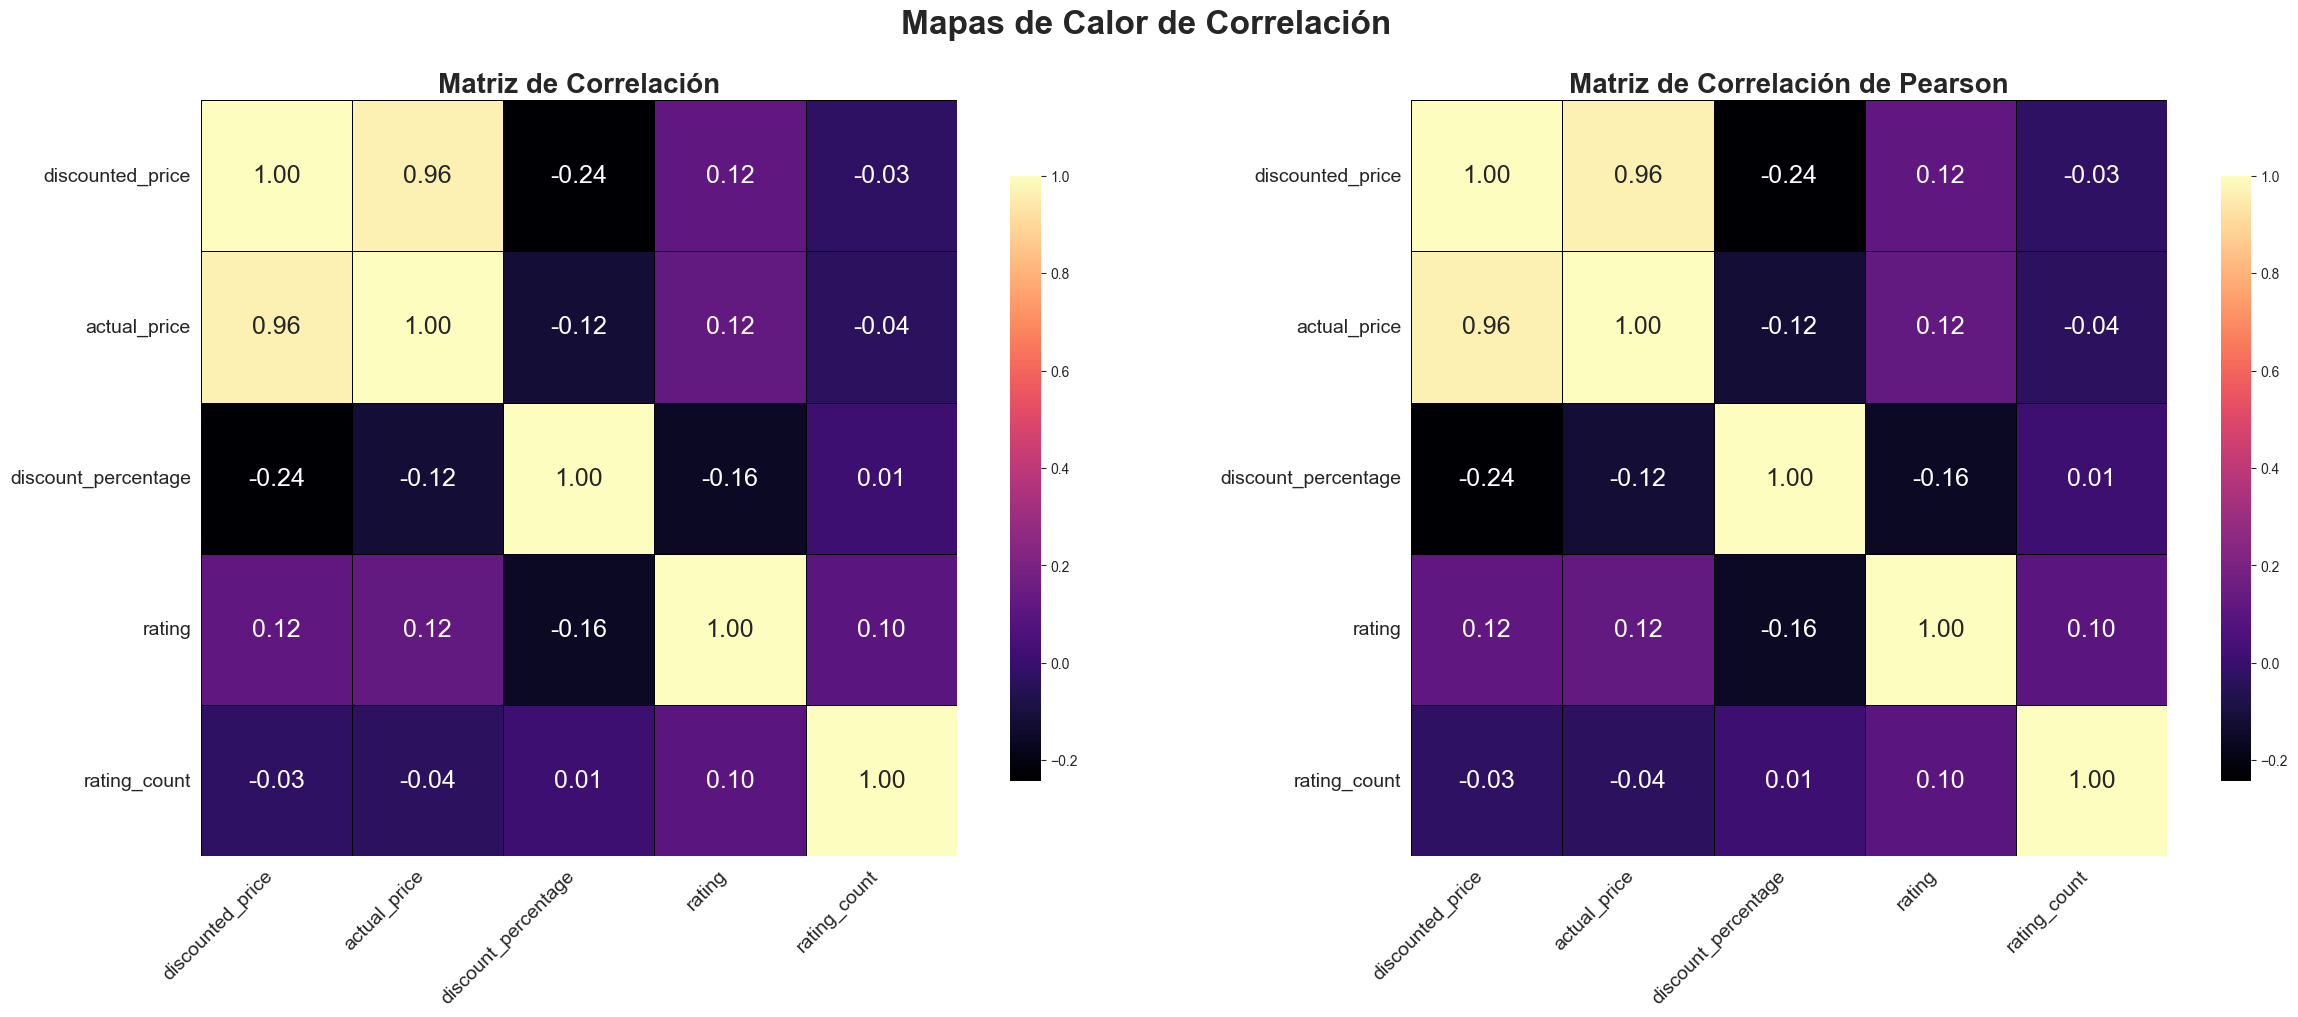

In [48]:
# Seleccionar columnas numéricas para el análisis de correlación
numerical_cols = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']
correlation_matrix = df[numerical_cols].corr()

# Configurar la figura y los subgráficos de matplotlib
fig, axes = plt.subplots(1, 2, figsize=(25, 10))
fig.suptitle('Mapas de Calor de Correlación', fontsize=24, fontweight='bold')  # Título principal más grande

# Crear el mapa de calor para la matriz de correlación general
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='magma', square=True,
            annot_kws={"size": 18},  # Tamaño de fuente aumentado para los valores anotados
            cbar_kws={"shrink": .8}, ax=axes[0], linewidths=0.5, linecolor='black')
axes[0].set_title('Matriz de Correlación', fontsize=20, fontweight='bold')  # Título del primer gráfico
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=14)
axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0, fontsize=14)

# Crear el mismo mapa de calor para enfatizar que es con Pearson (aunque ya lo es por defecto)
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='magma', square=True,
            annot_kws={"size": 18},  # Tamaño de fuente aumentado para los valores anotados
            cbar_kws={"shrink": .8}, ax=axes[1], linewidths=0.5, linecolor='black')
axes[1].set_title("Matriz de Correlación de Pearson", fontsize=20, fontweight='bold')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=14)
axes[1].set_yticklabels(axes[1].get_yticklabels(), rotation=0, fontsize=14)

# Mostrar el gráfico
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajustar el diseño para dejar espacio al título principal
plt.show()


In [55]:
!python -m textblob.download_corpora


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


#### **Análisis de Sentimientos**

In [ ]:
# Función para clasificar el sentimiento
def get_sentiment(review):
    analysis = TextBlob(review)
    # La polaridad varía de -1 (negativo) a 1 (positivo)
    if analysis.sentiment.polarity > 0:
        return 'Positivo'
    elif analysis.sentiment.polarity < 0:
        return 'Negativo'
    else:
        return 'Neutro'

# Aplicar la función de sentimiento a la columna 'review_content'
df['sentiment'] = df['review_content'].apply(get_sentiment)

# Opcional: Contar el número de reseñas en cada categoría de sentimiento
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

# Función para obtener las n palabras más frecuentes
def get_top_words(reviews, n=10):
    # Tokenizar y limpiar las palabras
    words = re.findall(r'\w+', reviews.lower())  # Extraer palabras y convertir a minúsculas
    # Contar la frecuencia de las palabras


sentiment
Positivo    1438
Negativo      26
Neutro         1
Name: count, dtype: int64


**Visualización de los Sentimientos Positivos, Negativos y Neutros**

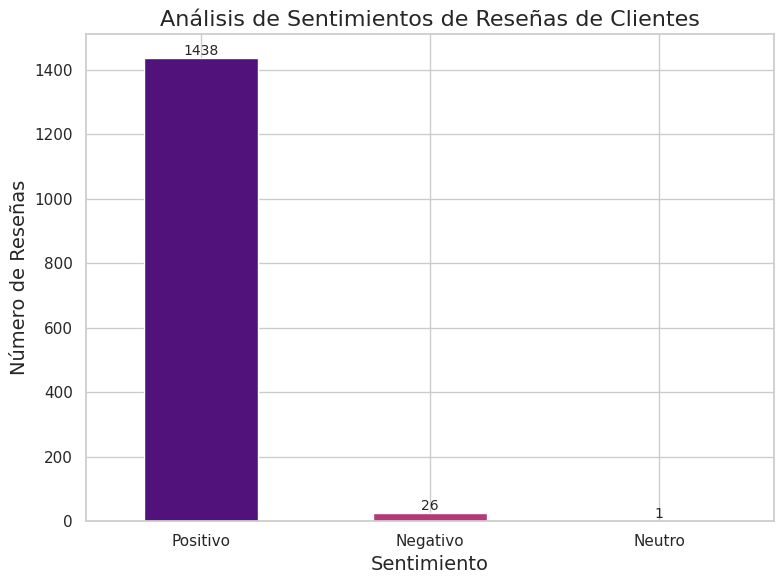

In [57]:
# Datos de ejemplo para el conteo de sentimientos (reemplaza con tus datos reales)
sentiment_counts = pd.Series({'Positivo': 1438, 'Negativo': 26, 'Neutro': 1})

# Configurar el estilo y la paleta de colores de seaborn
sns.set(style='whitegrid')
palette = sns.color_palette("magma", n_colors=len(sentiment_counts))

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
bars = sentiment_counts.plot(kind='bar', color=palette)

# Añadir títulos y etiquetas
plt.title('Análisis de Sentimientos de Reseñas de Clientes', fontsize=16)
plt.xlabel('Sentimiento', fontsize=14)
plt.ylabel('Número de Reseñas', fontsize=14)
plt.xticks(rotation=0)

# Añadir valores sobre las barras
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        int(bar.get_height()),  # Mostrar valor entero
        ha='center',
        va='bottom',  # Posicionar encima de la barra
        fontsize=10
    )

# Mostrar el gráfico
plt.tight_layout()
plt.show()


**Porcentajes de Sentimientos**

In [50]:
# Función para obtener la polaridad del sentimiento
def obtener_sentimiento(resena):
    return TextBlob(resena).sentiment.polarity

# Aplicar la función a la columna de contenido de reseñas
df['sentimiento'] = df['review_content'].apply(obtener_sentimiento)

# Clasificar el sentimiento según la polaridad
df['etiqueta_sentimiento'] = df['sentimiento'].apply(lambda x: 'Positivo' if x > 0 else ('Negativo' if x < 0 else 'Neutro'))

# Resumir los resultados en porcentaje
resumen_sentimiento = df['etiqueta_sentimiento'].value_counts(normalize=True) * 100

# Mostrar los resultados con porcentajes
print("Porcentaje de etiquetas de sentimiento (Porcentaje de reseñas):")
for etiqueta, porcentaje in resumen_sentimiento.items():
    print(f"{etiqueta}: {porcentaje:.2f}%")

# Visualizar la distribución de sentimientos con título actualizado
fig = px.pie(resumen_sentimiento, values=resumen_sentimiento.values, names=resumen_sentimiento.index,
             title='Porcentaje de etiquetas de sentimiento en reseñas de clientes')
fig.show()


Porcentaje de etiquetas de sentimiento (Porcentaje de reseñas):
Positivo: 98.16%
Negativo: 1.77%
Neutro: 0.07%


#


<h2 style="
  font-family: 'Segoe UI', sans-serif;
  font-size: 28px;
  font-weight: bold;
  text-align: center;
  background: linear-gradient(90deg, #ff6a00, #ee0979, #8e2de2, #4a00e0);
  -webkit-background-clip: text;
  -webkit-text-fill-color: transparent;
  color: transparent;
">
  Sistema de Recomendación
</h2>


#### **Recomendación de Productos**

**ID de Usuario con Calificaciones Más Bajas**

In [67]:
# Calcular la calificación promedio para cada usuario
average_rating_per_user = df.groupby('user_id')['rating'].mean()

# Encontrar el usuario con la calificación promedio más baja
lowest_rated_user_id = average_rating_per_user.idxmin()
lowest_average_rating = average_rating_per_user.min()

# Mostrar los resultados
print(f"ID del usuario con la calificación promedio más baja: {lowest_rated_user_id}")
print(f"Calificación promedio más baja: {lowest_average_rating:.2f}")


ID del usuario con la calificación promedio más baja: AGHT3K4KSG5MAQUSXRDT5VNB73GA,AE4Q5XQ7SZW35EEUJKQ3IV2IIBQQ
Calificación promedio más baja: 2.00


In [68]:
# Paso 1: Calcular las calificaciones promedio para cada usuario
user_avg_ratings = df.groupby('user_id')['rating'].mean()

# Paso 2: Ordenar las calificaciones promedio y obtener las más bajas
lowest_avg_ratings = user_avg_ratings.nsmallest(5)

# Paso 3: Encontrar los IDs de usuarios asociados con las calificaciones promedio más bajas
users_with_lowest_avg_rating = lowest_avg_ratings.index.tolist()

# Mostrar los resultados
print("Calificaciones Promedio Más Bajas:")
for user_id, avg_rating in lowest_avg_ratings.items():
    print(f"ID de Usuario: {user_id}, Calificación Promedio: {avg_rating:.2f}")

print(f"\nID(s) de Usuario con las Calificaciones Promedio Más Bajas: {users_with_lowest_avg_rating}")


Calificaciones Promedio Más Bajas:
ID de Usuario: AGHT3K4KSG5MAQUSXRDT5VNB73GA,AE4Q5XQ7SZW35EEUJKQ3IV2IIBQQ, Calificación Promedio: 2.00
ID de Usuario: AHRDA66XO63XYCBZJMW4EUJN3BFQ,AELE2SOO7LBNHXU7UK5F7TGQHA6Q,AHAVCLRCPYO2MFYPTURF33N7XH5A,AE762UDUDQPW4R4QHHTIL7TPTJUA,AEGZSJIUSKF2EKIKGLNKY2CU6WXA, Calificación Promedio: 2.30
ID de Usuario: AG2BB3Q2AQB7SBFBURGYSMFHDAOA,AGFXIO346VXYI35ANHRTU7FE7ZGA,AEZIOFC5L34FZZOMGKEHXHLG6KQA,AFDS7H2OSIL3I4CZBN7C7NS4XOXA,AEBSIJDEVFVOC7PQYB3W36OLAHNA,AGHY5MD6U2E57UWJTNGFKKQ5KROA,AF23NVMNXHKORCJCQPGAW6PSXMPA,AHSOUBG4CYVABTQRPHI64FAU4NLQ, Calificación Promedio: 2.60
ID de Usuario: AEJKHGA26MUVUZIYWZOW4B6I4X7Q,AF3B47EOSBULYG63EGZZZGO6HTNA,AGNSXRFJBDVGM7FS7YYPNCEO7XFQ,AHR53IW5LAAXGGFK3DRWRMXMM7KQ,AE5W6S5KCJV6L2WMBIOKYWQJN37Q,AH5J4DROVHI6XHMTCBAK7WWU3F4Q,AE5KAK3S3XZDPRUR2VCND2QNZTUQ,AEKG7ELYA43YNPZ2YT3ORIL2VSOA, Calificación Promedio: 2.80
ID de Usuario: AHSYI7EUDN2RNS2IPMGAS5MKLXPQ,AHHLJNBYVOGQSFG2Q4UMMRU3V3UA,AFC7PJA3XS6MHXYAUF3JZDHDUZWQ,AFL6U5G4P2KLLZU4HCOX

**ID de Producto con Calificación Promedio Más Baja**

In [69]:
# Crear una matriz usuario-producto
user_item_matrix = df.pivot_table(index='user_id', columns='product_id', values='rating')

# Calcular la similitud entre usuarios usando similitud coseno
user_similarity = cosine_similarity(user_item_matrix.fillna(0))
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

# Definir el ID de usuario con la calificación promedio más alta
user_id = 'AGHT3K4KSG5MAQUSXRDT5VNB73GA,AE4Q5XQ7SZW35EEUJKQ3IV2IIBQQ'

# Obtener los usuarios similares más cercanos
similar_users = user_similarity_df[user_id].nlargest(5).index.tolist()

# Reemplazar ceros con NaN para ignorarlos en el cálculo del promedio
user_item_matrix_no_zeros = user_item_matrix.replace(0, np.nan)

# Calcular las calificaciones promedio más bajas entre los usuarios similares (excluyendo ceros)
recommended_products = user_item_matrix_no_zeros.loc[similar_users].mean().nsmallest(5).dropna()

# Convertir a DataFrame para mejor legibilidad
recommended_products_df = pd.DataFrame(recommended_products, columns=['calificación_promedio'])
recommended_products_df.index.name = 'product_id'
recommended_products_df.reset_index(inplace=True)

# Mostrar los productos recomendados basados en las calificaciones más bajas de usuarios similares
print("Productos recomendados basados en las calificaciones más bajas de usuarios similares:")
print(recommended_products_df)


Productos recomendados basados en las calificaciones más bajas de usuarios similares:
   product_id  calificación_promedio
0  B0BPJBTB3F                    2.0
1  B09V2PZDX8                    4.0
2  B09V2Q4QVQ                    4.0
3  B09YDFDVNS                    4.0
4  B09YDFKJF8                    4.0


**Productos con Calificación Más Baja y su Categoría**

In [70]:
# Crear una matriz de interacción usuario-producto
user_item_matrix = df.pivot_table(index='user_id', columns='product_id', values='rating')

# Rellenar los valores NaN con 0 (o usar otra estrategia si se desea)
user_item_matrix.fillna(0, inplace=True)

# Calcular la similitud entre usuarios usando similitud coseno
user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

# Función para obtener recomendaciones de productos para un usuario dado, enfocándose en las calificaciones más bajas
def not_recommend_lowest_rated_products(user_id, num_recommendations=5):
    # Obtener usuarios similares al usuario dado
    similar_users = user_similarity_df[user_id].nlargest(6).index.tolist()  # Obtener los 5 usuarios más similares

    # Obtener las calificaciones usuario-producto de estos usuarios similares
    similar_users_ratings = user_item_matrix.loc[similar_users]

    # Calcular la media de calificaciones de usuarios similares, considerando solo productos calificados
    similar_users_ratings_non_zero = similar_users_ratings.replace(0, np.nan)  # Reemplazar 0 con NaN para calcular la media
    recommended_products = similar_users_ratings_non_zero.mean().nsmallest(num_recommendations).dropna()

    # Convertir a DataFrame para mejor legibilidad
    recommended_products_df = pd.DataFrame(recommended_products, columns=['calificación_promedio'])
    recommended_products_df.index.name = 'product_id'
    recommended_products_df.reset_index(inplace=True)

    # Combinar con el DataFrame original para obtener detalles de los productos
    recommendations_with_details = recommended_products_df.merge(
        df[['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage']],
        on='product_id',
        how='left'
    )

    # Obtener el nombre del usuario para el user_id dado
    user_name = df.loc[df['user_id'] == user_id, 'user_name'].unique()

    # Agregar el nombre del usuario al DataFrame de recomendaciones
    recommendations_with_details['user_name'] = user_name[0] if user_name.size > 0 else 'Desconocido'

    return recommendations_with_details

# Ejemplo de uso
# Reemplazar con un user_id real de su conjunto de datos
user_id = 'AGHT3K4KSG5MAQUSXRDT5VNB73GA,AE4Q5XQ7SZW35EEUJKQ3IV2IIBQQ'
recommended_items = not_recommend_lowest_rated_products(user_id)

print(f"Productos NO recomendados para el usuario: {user_id} (Nombre de usuario: {recommended_items['user_name'].iloc[0]})")
recommended_items


Productos NO recomendados para el usuario: AGHT3K4KSG5MAQUSXRDT5VNB73GA,AE4Q5XQ7SZW35EEUJKQ3IV2IIBQQ (Nombre de usuario: Manidipa Sengupta,Vidisha)


,product_id,calificación_promedio,product_name,category,discounted_price,actual_price,discount_percentage,user_name
0,B0BPJBTB3F,2.0,Khaitan ORFin Fan heater for Home and kitchen-K0 2215,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHeaters|FanHeaters",1299.0,2495.0,48,"Manidipa Sengupta,Vidisha"
1,B09V2PZDX8,4.0,"Nokia 105 Single SIM, Keypad Mobile Phone with Wireless FM Radio | Blue",Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|BasicMobiles,1299.0,1599.0,19,"Manidipa Sengupta,Vidisha"
2,B09V2Q4QVQ,4.0,"Nokia 105 Single SIM, Keypad Mobile Phone with Wireless FM Radio | Charcoal",Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|BasicMobiles,1299.0,1599.0,19,"Manidipa Sengupta,Vidisha"
3,B09YDFDVNS,4.0,"Nokia 105 Plus Single SIM, Keypad Mobile Phone with Wireless FM Radio, Memory Card Slot and MP3 Player | Red",Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|BasicMobiles,1324.0,1699.0,22,"Manidipa Sengupta,Vidisha"
4,B09YDFKJF8,4.0,"Nokia 105 Plus Single SIM, Keypad Mobile Phone with Wireless FM Radio, Memory Card Slot and MP3 Player | Charcoal",Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|BasicMobiles,1324.0,1699.0,22,"Manidipa Sengupta,Vidisha"


**ID de Usuario con Calificaciones Más Altas**

In [71]:
# Paso 1: Calcular la calificación promedio para cada usuario
user_avg_ratings = df.groupby('user_id')['rating'].mean()

# Paso 2: Ordenar las calificaciones promedio y obtener las más altas
highest_avg_ratings = user_avg_ratings.nlargest(5)

# Paso 3: Encontrar los IDs de usuario asociados con las calificaciones promedio más altas
users_with_highest_avg_rating = highest_avg_ratings.index.tolist()

# Mostrar los resultados
print("Calificaciones Promedio Más Altas:")
for user_id, avg_rating in highest_avg_ratings.items():
    print(f"ID de Usuario: {user_id}, Calificación Promedio: {avg_rating:.2f}")

print(f"\nID(s) de Usuario con las Calificaciones Promedio Más Altas: {users_with_highest_avg_rating}")


Calificaciones Promedio Más Altas:
ID de Usuario: AF7EOXYL5K36BDP6PXF6K2TL5TPA,AEN7NV2P5WNHM7EXCWWWES43N3PQ,AFFCNMMFC5VPKDGX5FGNODAS6Z6Q,AFQJM63Q7OMAP62BP3TB4YQEZAXA,AGN5DA5YJ2ZNRT47PCFQTDEDEHNQ, Calificación Promedio: 5.00
ID de Usuario: AFLLEPVLIAH2DFSHAZ77KWFM72ZA,AHY2YZWK63CNZ626MC3TFQRBB7RA,AG3PG2EM3MIT6IYPS5KZRIAF4QDQ,AE2KS6ZY376YMGX7RNKV7VXUEGFQ,AHUPZTSAPO7GABNBTIBDYNFKYFKQ,AENQGQZ4L2CTB7HT4QUUZB3IJO6A,AFZDZGWHZNPZ3VLECIBYSFUDGT4A,AGOYRUEHDI3SH7N4KBLQS4KE6G2A, Calificación Promedio: 5.00
ID de Usuario: AGJC5O5H5BBXWUV7WRIEIOOR3TVQ, Calificación Promedio: 5.00
ID de Usuario: AEU7DVFEL43XZ6T4D572W2ZLBRKQ,AGWOH7CFDMUVW52NMZWQBKBNNQOA,AGZN422FGG7JO3T5YY6IVUELOODA, Calificación Promedio: 4.80
ID de Usuario: AGRJZJKWKIE573KM5FWPOH4F7YCA,AEHV4VOLDQX5XYA42OZHALYA3USA,AHOZBF2VFWS62WO3XJT73NHAPQMA,AECYWFZ53SIMOPOKAILDW3VNGRRA,AHGAALVLOMKMYOG4JAJALWFSHLCA,AG6EGJADJ2KCEGGKRPKY2B4MAJMA,AGVVZWV4QHKHNWI7FT3ENKKKBCHA,AHIRZ7N53BSLWFWNEUWYKT6NH6OQ, Calificación Promedio: 4.80

ID(s) de Usuario co

In [72]:
# Crear una matriz de interacción usuario-producto
user_item_matrix = df.pivot_table(index='user_id', columns='product_id', values='rating', fill_value=0)

# Convertir a DataFrame para facilitar la manipulación
user_item_matrix = pd.DataFrame(user_item_matrix)

# Mostrar las dimensiones de la matriz
print(user_item_matrix.shape)


(1194, 1351)


In [74]:
# Calcular la similitud coseno entre los usuarios
user_similarity = cosine_similarity(user_item_matrix)

# Convertir la matriz de similitud a un DataFrame para facilitar la interpretación
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)


**Recomendación de Productos Similares Basada en Calificación Más Alta**

In [99]:
# Crear una matriz usuario-producto
user_item_matrix = df.pivot_table(index='user_id', columns='product_id', values='rating')

# Calcular la similitud entre usuarios usando similitud coseno, llenando NaN con 0
user_similarity = cosine_similarity(user_item_matrix.fillna(0))
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

# Definir el ID del usuario con el promedio más alto de rating
user_id = 'AF7EOXYL5K36BDP6PXF6K2TL5TPA,AEN7NV2P5WNHM7EXCWWWES43N3PQ,AFFCNMMFC5VPKDGX5FGNODAS6Z6Q,AFQJM63Q7OMAP62BP3TB4YQEZAXA,AGN5DA5YJ2ZNRT47PCFQTDEDEHNQ'

# Obtener usuarios similares al usuario definido
similar_users = user_similarity_df[user_id].nlargest(5).index.tolist()

# Reemplazar ceros por NaN para ignorarlos en el cálculo del promedio
user_item_matrix_no_zeros = user_item_matrix.replace(0, np.nan)

# Calcular los productos con los ratings promedio más altos entre los usuarios similares (excluyendo ceros)
recommended_products = user_item_matrix_no_zeros.loc[similar_users].mean().nlargest(5).dropna()

# Convertir a DataFrame para mejor visualización
recommended_products_df = pd.DataFrame(recommended_products, columns=['promedio_rating'])
recommended_products_df.index.name = 'product_id'
recommended_products_df.reset_index(inplace=True)

print("Productos recomendados basados en los ratings más altos de usuarios similares:")
print(recommended_products_df)


Productos recomendados basados en los ratings más altos de usuarios similares:
   product_id  promedio_rating
0  B0BP7XLX48              5.0
1  B07ZR4S1G4              4.4
2  B09XJ1LM7R              4.3
3  B00HVXS7WC              4.2
4  B09V2PZDX8              4.0


**Productos Más Recomendados**

In [101]:
# Crear una matriz de interacción usuario-producto
user_item_matrix = df.pivot_table(index='user_id', columns='product_id', values='rating')

# Rellenar valores NaN con 0 (o se puede usar otra estrategia)
user_item_matrix.fillna(0, inplace=True)

# Calcular la similitud entre usuarios usando similitud coseno
user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

# Función para obtener recomendaciones de productos para un usuario dado
def recommend_products(user_id, num_recommendations=5):
    # Obtener usuarios similares al usuario dado
    similar_users = user_similarity_df[user_id].nlargest(6).index.tolist()  # Top 5 usuarios similares

    # Reemplazar ceros por NaN para ignorarlos en el cálculo del promedio
    user_item_matrix_no_zeros = user_item_matrix.replace(0, np.nan)

    # Calcular el promedio de ratings de los usuarios similares (ignorando ratings 0)
    recommended_products = user_item_matrix_no_zeros.loc[similar_users].mean().nlargest(num_recommendations).dropna()

    # Convertir a DataFrame para mejor legibilidad
    recommended_products_df = pd.DataFrame(recommended_products, columns=['rating_promedio'])
    recommended_products_df.index.name = 'product_id'
    recommended_products_df.reset_index(inplace=True)

    # Unir con el DataFrame original para obtener detalles de los productos
    recommendations_with_details = recommended_products_df.merge(
        df[['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage']].drop_duplicates(),
        on='product_id',
        how='left'
    )

    # Obtener el nombre del usuario para el ID dado
    user_name = df.loc[df['user_id'] == user_id, 'user_name'].unique()

    # Añadir el nombre de usuario al DataFrame de recomendaciones
    recommendations_with_details['user_name'] = user_name[0] if user_name.size > 0 else 'Desconocido'

    return recommendations_with_details

# Ejemplo de uso
user_id = 'AF7EOXYL5K36BDP6PXF6K2TL5TPA,AEN7NV2P5WNHM7EXCWWWES43N3PQ,AFFCNMMFC5VPKDGX5FGNODAS6Z6Q,AFQJM63Q7OMAP62BP3TB4YQEZAXA,AGN5DA5YJ2ZNRT47PCFQTDEDEHNQ'  # Reemplazar con un ID válido
recommended_items = recommend_products(user_id)

print(f"Productos recomendados para el usuario con ID: {user_id} (Nombre de usuario: {recommended_items['user_name'].iloc[0]})")
recommended_items


Productos recomendados para el usuario con ID: AF7EOXYL5K36BDP6PXF6K2TL5TPA,AEN7NV2P5WNHM7EXCWWWES43N3PQ,AFFCNMMFC5VPKDGX5FGNODAS6Z6Q,AFQJM63Q7OMAP62BP3TB4YQEZAXA,AGN5DA5YJ2ZNRT47PCFQTDEDEHNQ (Nombre de usuario: Amazon Customer,kamal sahota,Pankaj,luvsmplcty,kanta)


,product_id,rating_promedio,product_name,category,discounted_price,actual_price,discount_percentage,user_name
0,B0BP7XLX48,5.0,"Syncwire LTG to USB Cable for Fast Charging Compatible with Phone 5/ 5C/ 5S/ 6/ 6S/ 7/8/ X/XR/XS Max/ 11/12/ 13 Series and Pad Air/Mini, Pod & Other Devices (1.1 Meter, White)",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,399.0,1999.0,80,"Amazon Customer,kamal sahota,Pankaj,luvsmplcty,kanta"
1,B07ZR4S1G4,4.4,Universal Remote Control for All Sony TV for All LCD LED and Bravia TVs Remote,"Electronics|HomeTheater,TV&Video|Accessories|RemoteControls",239.0,699.0,66,"Amazon Customer,kamal sahota,Pankaj,luvsmplcty,kanta"
2,B084MZXJNK,4.4,"Belkin Apple Certified Lightning To Type C Cable, Tough Unbreakable Braided Fast Charging For Iphone, Ipad, Air Pods, 3.3 Feet (1 Meters) White",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,1599.0,1999.0,20,"Amazon Customer,kamal sahota,Pankaj,luvsmplcty,kanta"
3,B084N133Y7,4.4,"Belkin Apple Certified Lightning To Type C Cable, Fast Charging For Iphone, Ipad, Air Pods, 3.3 Feet (1 Meters) White",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,1499.0,1999.0,25,"Amazon Customer,kamal sahota,Pankaj,luvsmplcty,kanta"
4,B09XJ1LM7R,4.3,7SEVEN® Compatible for Tata Sky Remote Original Set Top HD Box and Suitable for SD Tata Play setup Box Remote Control,"Electronics|HomeTheater,TV&Video|Accessories|RemoteControls",399.0,799.0,50,"Amazon Customer,kamal sahota,Pankaj,luvsmplcty,kanta"


In [78]:
# Crear una matriz usuario-producto
user_item_matrix = df.pivot_table(index='user_id', columns='product_id', values='rating', fill_value=0)


In [79]:
# Calcular la similitud coseno entre usuarios
user_similarity = cosine_similarity(user_item_matrix)

# Convertir a DataFrame para facilitar el manejo
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)


#### **Recomendar Productos Mejor Calificados Basados en el ID de Usuario**

In [80]:
# Crear una matriz de interacción usuario-producto
user_item_matrix = df.pivot_table(index='user_id', columns='product_id', values='rating')

# Rellenar valores NaN con 0 (o podría usarse otra estrategia)
user_item_matrix.fillna(0, inplace=True)

# Calcular similitud entre usuarios usando similitud coseno
user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

# Función para obtener recomendaciones de productos para un usuario dado
def obtener_recomendaciones(user_id, user_item_matrix, user_similarity_df, num_recomendaciones=5):
    # Obtener usuarios similares (excluyendo al usuario mismo)
    usuarios_similares = user_similarity_df[user_id].sort_values(ascending=False).index[1:]

    # Crear una Serie para almacenar las puntuaciones de los productos
    puntuaciones_productos = pd.Series(dtype=float)

    # Iterar sobre los usuarios similares
    for usuario_similar in usuarios_similares:
        # Obtener productos calificados por el usuario similar
        valoraciones_usuario_similar = user_item_matrix.loc[usuario_similar]

        # Considerar solo productos que el usuario actual no ha calificado
        valoraciones_usuario = user_item_matrix.loc[user_id]
        productos_no_calificados = valoraciones_usuario_similar[valoraciones_usuario == 0]

        # Sumar las puntuaciones a la serie de puntuaciones de productos
        puntuaciones_productos = puntuaciones_productos.add(productos_no_calificados, fill_value=0)

    # Limitar las puntuaciones máximas a 5
    puntuaciones_productos = puntuaciones_productos.clip(upper=5)

    # Ordenar productos por puntuación y devolver las mejores recomendaciones
    recomendaciones = puntuaciones_productos.sort_values(ascending=False).head(num_recomendaciones)

    return recomendaciones

# Ejemplo de uso
user_id = 'AF7EOXYL5K36BDP6PXF6K2TL5TPA,AEN7NV2P5WNHM7EXCWWWES43N3PQ,AFFCNMMFC5VPKDGX5FGNODAS6Z6Q,AFQJM63Q7OMAP62BP3TB4YQEZAXA,AGN5DA5YJ2ZNRT47PCFQTDEDEHNQ'  # Reemplazar por un user_id real de tu dataset
productos_recomendados = obtener_recomendaciones(user_id, user_item_matrix, user_similarity_df)

# Mostrar productos recomendados con detalles
print("Productos recomendados para el usuario:", user_id)
for producto in productos_recomendados.index:
    info_producto = df[df['product_id'] == producto].iloc[0]
    print(f"ID Producto: {producto}, Nombre: {info_producto['product_name']}, "
          f"Precio con Descuento: {info_producto['discounted_price']}, Puntuación Estimada: {productos_recomendados[producto]:.2f}")


Productos recomendados para el usuario: AF7EOXYL5K36BDP6PXF6K2TL5TPA,AEN7NV2P5WNHM7EXCWWWES43N3PQ,AFFCNMMFC5VPKDGX5FGNODAS6Z6Q,AFQJM63Q7OMAP62BP3TB4YQEZAXA,AGN5DA5YJ2ZNRT47PCFQTDEDEHNQ
ID Producto: B097R25DP7, Nombre: Noise ColorFit Pulse Smartwatch with 3.56 cm (1.4") Full Touch HD Display, SpO2, Heart Rate, Sleep Monitors & 10-Day Battery - Jet Black, Precio con Descuento: 1599.0, Puntuación Estimada: 5.00
ID Producto: B0BQRJ3C47, Nombre: REDTECH USB-C to Lightning Cable 3.3FT, [Apple MFi Certified] Lightning to Type C Fast Charging Cord Compatible with iPhone 14/13/13 pro/Max/12/11/X/XS/XR/8, Supports Power Delivery - White, Precio con Descuento: 249.0, Puntuación Estimada: 5.00
ID Producto: B09YV4MW2T, Nombre: Fire-Boltt India's No 1 Smartwatch Brand Talk 2 Bluetooth Calling Smartwatch with Dual Button, Hands On Voice Assistance, 60 Sports Modes, in Built Mic & Speaker with IP68 Rating, Precio con Descuento: 2199.0, Puntuación Estimada: 5.00
ID Producto: B09NVPSCQT, Nombre: Noise C

#### **Mostrar los Productos y Categorías con la Calificación Más Alta**

In [81]:
# Paso 1: Encontrar la calificación más alta
highest_rating = df['rating'].max()

# Paso 2: Encontrar los IDs de usuario asociados con la calificación más alta
usuarios_con_calificacion_maxima = df[df['rating'] == highest_rating]['user_id'].unique()

# Mostrar los resultados
print(f"Calificación más alta: {highest_rating}")
print(f"ID(s) de usuario con la calificación más alta: {usuarios_con_calificacion_maxima.tolist()}")


Calificación más alta: 5.0
ID(s) de usuario con la calificación más alta: ['AF7EOXYL5K36BDP6PXF6K2TL5TPA,AEN7NV2P5WNHM7EXCWWWES43N3PQ,AFFCNMMFC5VPKDGX5FGNODAS6Z6Q,AFQJM63Q7OMAP62BP3TB4YQEZAXA,AGN5DA5YJ2ZNRT47PCFQTDEDEHNQ', 'AGJC5O5H5BBXWUV7WRIEIOOR3TVQ', 'AFLLEPVLIAH2DFSHAZ77KWFM72ZA,AHY2YZWK63CNZ626MC3TFQRBB7RA,AG3PG2EM3MIT6IYPS5KZRIAF4QDQ,AE2KS6ZY376YMGX7RNKV7VXUEGFQ,AHUPZTSAPO7GABNBTIBDYNFKYFKQ,AENQGQZ4L2CTB7HT4QUUZB3IJO6A,AFZDZGWHZNPZ3VLECIBYSFUDGT4A,AGOYRUEHDI3SH7N4KBLQS4KE6G2A']


In [82]:
# Obtener los 10 productos con las calificaciones más altas
top_10_productos_mejor_calificados = df.nlargest(10, 'rating')

# Mostrar los resultados
print("Top 10 Productos con Mejor Calificación:")
for index, producto in top_10_productos_mejor_calificados.iterrows():
    print(f"\nID del Producto: {producto['product_id']}")
    print(f"Nombre del Producto: {producto['product_name']}")
    print(f"Categoría: {producto['category']}")
    print(f"Calificación: {producto['rating']:.2f}")


Top 10 Productos con Mejor Calificación:

ID del Producto: B0BP7XLX48
Nombre del Producto: Syncwire LTG to USB Cable for Fast Charging Compatible with Phone 5/ 5C/ 5S/ 6/ 6S/ 7/8/ X/XR/XS Max/ 11/12/ 13 Series and Pad Air/Mini, Pod & Other Devices (1.1 Meter, White)
Categoría: Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables
Calificación: 5.00

ID del Producto: B0BQRJ3C47
Nombre del Producto: REDTECH USB-C to Lightning Cable 3.3FT, [Apple MFi Certified] Lightning to Type C Fast Charging Cord Compatible with iPhone 14/13/13 pro/Max/12/11/X/XS/XR/8, Supports Power Delivery - White
Categoría: Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables
Calificación: 5.00

ID del Producto: B09ZHCJDP1
Nombre del Producto: Amazon Basics Wireless Mouse | 2.4 GHz Connection, 1600 DPI | Type - C Adapter | Upto 12 Months of Battery Life | Ambidextrous Design | Suitable for PC/Mac/Laptop
Categoría: Computers&Accessories|Accessories&Peripherals

In [83]:
# Crear una matriz de interacción usuario-producto
user_item_matrix = df.pivot_table(index='user_id', columns='product_id', values='rating', fill_value=0)

# Calcular la similitud entre usuarios usando similitud de coseno
user_similarity = cosine_similarity(user_item_matrix)

# Convertir la matriz de similitud en un DataFrame para facilitar el manejo
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

# Función para obtener recomendaciones de productos para un usuario específico
def obtener_recomendaciones(user_id, user_item_matrix, user_similarity_df, num_recomendaciones=5):
    # Obtener los usuarios similares al usuario dado (excluyendo al mismo usuario)
    usuarios_similares = user_similarity_df[user_id].sort_values(ascending=False).index[1:]

    # Crear una Serie para almacenar las puntuaciones de los productos
    puntuaciones_productos = pd.Series(dtype=float)

    # Iterar sobre los usuarios similares
    for usuario_similar in usuarios_similares:
        # Obtener calificaciones del usuario similar
        calificaciones_similar = user_item_matrix.loc[usuario_similar]

        # Considerar solo productos que el usuario actual no ha calificado
        calificaciones_usuario = user_item_matrix.loc[user_id]
        productos_no_calificados = calificaciones_similar[calificaciones_usuario == 0]

        # Sumar las puntuaciones de los productos
        puntuaciones_productos = puntuaciones_productos.add(productos_no_calificados, fill_value=0)

    # Ordenar los productos por puntuación y devolver los mejores
    recomendaciones = puntuaciones_productos.sort_values(ascending=False).head(num_recomendaciones)

    return recomendaciones

# Ejemplo de uso
user_id = 'AF7EOXYL5K36BDP6PXF6K2TL5TPA,AEN7NV2P5WNHM7EXCWWWES43N3PQ,AFFCNMMFC5VPKDGX5FGNODAS6Z6Q,AFQJM63Q7OMAP62BP3TB4YQEZAXA,AGN5DA5YJ2ZNRT47PCFQTDEDEHNQ'  # Reemplaza con un user_id válido de tu dataset
productos_recomendados = obtener_recomendaciones(user_id, user_item_matrix, user_similarity_df)

# Mostrar los productos recomendados
print("Productos Recomendados para el Usuario con ID:", user_id)
for producto in productos_recomendados.index:
    info_producto = df[df['product_id'] == producto].iloc[0]
    print(f"ID del Producto: {producto}, Nombre del Producto: {info_producto['product_name']}, Precio Real: {info_producto['actual_price']}")


Productos Recomendados para el Usuario con ID: AF7EOXYL5K36BDP6PXF6K2TL5TPA,AEN7NV2P5WNHM7EXCWWWES43N3PQ,AFFCNMMFC5VPKDGX5FGNODAS6Z6Q,AFQJM63Q7OMAP62BP3TB4YQEZAXA,AGN5DA5YJ2ZNRT47PCFQTDEDEHNQ
ID del Producto: B09MT84WV5, Nombre del Producto: Samsung EVO Plus 128GB microSDXC UHS-I U3 130MB/s Full HD & 4K UHD Memory Card with Adapter (MB-MC128KA), Blue, Precio Real: 3999.0
ID del Producto: B077Z65HSD, Nombre del Producto: boAt A400 USB Type-C to USB-A 2.0 Male Data Cable, 2 Meter (Black), Precio Real: 999.0
ID del Producto: B09YV4MW2T, Nombre del Producto: Fire-Boltt India's No 1 Smartwatch Brand Talk 2 Bluetooth Calling Smartwatch with Dual Button, Hands On Voice Assistance, 60 Sports Modes, in Built Mic & Speaker with IP68 Rating, Precio Real: 9999.0
ID del Producto: B08WRBG3XW, Nombre del Producto: boAt Type C A325 Tangle-free, Sturdy Type C Cable with 3A Rapid Charging & 480mbps Data Transmission(Black), Precio Real: 499.0
ID del Producto: B09ZQK9X8G, Nombre del Producto: Noise Color

#### **Recomendar Productos Basados en Similitud y Calificaciones Más Altas**

In [85]:
import pandas as pd

def get_content_based_recommendations(product_id, df, num_recommendations=5):
    # Validar si el producto existe
    if product_id not in df['product_id'].values:
        print(f"Product ID '{product_id}' not found in the dataset.")
        return pd.DataFrame()

    # Obtener la categoría del producto dado
    product_category = df.loc[df['product_id'] == product_id, 'category'].values[0]

    # Filtrar productos de la misma categoría
    similar_products = df[df['category'] == product_category]

    # Excluir el producto original
    similar_products = similar_products[similar_products['product_id'] != product_id]

    # Ordenar por calificación descendente
    recommendations = similar_products.sort_values(by='rating', ascending=False).head(num_recommendations)

    return recommendations[['product_id', 'product_name', 'category', 'rating']]

# Ejemplo de uso
product_id = 'B0BP7XLX48'  # Reemplaza con un product_id válido
recommended_products = get_content_based_recommendations(product_id, df)

# Mostrar los productos recomendados
if not recommended_products.empty:
    print(f"\nProductos recomendados similares al producto con ID {product_id}:")
    for index, row in recommended_products.iterrows():
        print(f"ID del producto: {row['product_id']}, Nombre del producto: {row['product_name']}, "
              f"Categoría: {row['category']}, Calificación: {row['rating']:.2f}")




Productos recomendados similares al producto con ID B0BP7XLX48:
ID del producto: B0BQRJ3C47, Nombre del producto: REDTECH USB-C to Lightning Cable 3.3FT, [Apple MFi Certified] Lightning to Type C Fast Charging Cord Compatible with iPhone 14/13/13 pro/Max/12/11/X/XS/XR/8, Supports Power Delivery - White, Categoría: Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables, Calificación: 5.00
ID del producto: B09C6HXFC1, Nombre del producto: Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black, Categoría: Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables, Calificación: 4.50
ID del producto: B00NH11PEY, Nombre del producto: AmazonBasics USB 2.0 - A-Male to A-Female Extension Cable for Personal Computer, Printer (Black, 9.8 Feet/3 Meters), Categoría: Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables, C

#### **Versión mejorada en construcción**

In [94]:
df_products = df[['product_id', 'product_name', 'category']].drop_duplicates()

def recommend_products(
    user_id, 
    user_item_matrix, 
    user_similarity_df, 
    df_products, 
    top_n=5, 
    high_rating=True, 
    sim_threshold=0.1
):
    """
    Recomienda productos para un usuario dado basado en ratings de usuarios similares.
    
    Args:
        user_id (str): ID del usuario para quien se hacen recomendaciones.
        user_item_matrix (pd.DataFrame): Matriz usuario-producto con ratings.
        user_similarity_df (pd.DataFrame): Matriz de similitud entre usuarios.
        df_products (pd.DataFrame): Info de productos con columnas ['product_id', 'product_name', 'category'].
        top_n (int): Número de productos recomendados a retornar.
        high_rating (bool): Si True, recomienda productos con ratings altos. Si False, los más bajos.
        sim_threshold (float): Umbral mínimo de similitud para considerar usuarios similares.
        
    Returns:
        pd.DataFrame: DataFrame con productos recomendados y su score, unido con info de productos.
    """

    # Verificación de existencia del usuario en ambas matrices
    if user_id not in user_item_matrix.index:
        print(f"❌ Error: Usuario '{user_id}' no encontrado en user_item_matrix.")
        return pd.DataFrame()

    if user_id not in user_similarity_df.index:
        print(f"❌ Error: Usuario '{user_id}' no encontrado en user_similarity_df.")
        return pd.DataFrame()

    # Obtener usuarios similares con similitud por encima del umbral, excluyendo al usuario mismo
    similar_users = user_similarity_df.loc[user_id].drop(user_id)
    similar_users = similar_users[similar_users > sim_threshold]

    if similar_users.empty:
        print(f"⚠️ No se encontraron usuarios similares con similitud > {sim_threshold} para '{user_id}'.")
        return pd.DataFrame()

    # Productos ya calificados por el usuario
    rated_products = user_item_matrix.loc[user_id].dropna().index

    # Productos no calificados por el usuario (candidatos)
    products_to_consider = user_item_matrix.columns.difference(rated_products)

    product_scores = pd.Series(dtype=float)

    # Calcular score ponderado para cada producto candidato
    for product in products_to_consider:
        # Ratings de usuarios similares para este producto
        ratings = user_item_matrix.loc[similar_users.index, product]
        similarities = similar_users.loc[ratings.index]

        # Filtrar solo usuarios que calificaron el producto
        valid_mask = ratings.notna()
        ratings = ratings[valid_mask]
        similarities = similarities[valid_mask]

        if ratings.empty:
            continue

        sum_sim = similarities.sum()
        if sum_sim == 0:
            continue

        weighted_score = np.dot(ratings, similarities) / sum_sim
        product_scores.at[product] = weighted_score

    if product_scores.empty:
        print("⚠️ No hay productos para recomendar basados en usuarios similares.")
        return pd.DataFrame()

    # Ordenar según high_rating o no
    product_scores = product_scores.sort_values(ascending=not high_rating)

    # Seleccionar top_n
    recommended_products = product_scores.head(top_n).reset_index()
    recommended_products.columns = ['product_id', 'score']

    # Añadir información descriptiva del producto
    result = pd.merge(recommended_products, df_products, on='product_id', how='left')

    return result


# --- EJEMPLO DE USO ---

# user_id válido (asegúrate que exista en tu user_item_matrix)
user_id = "AEAHQT2GADXG7O5HE362SSWYG5TQ"

result = recommend_products(user_id, user_item_matrix, user_similarity_df, df_products, top_n=5, high_rating=True)

if not result.empty:
    print(f"Recomendaciones para el usuario: {user_id}")
    print(result)
else:
    print("No se encontraron recomendaciones.")

❌ Error: Usuario 'AEAHQT2GADXG7O5HE362SSWYG5TQ' no encontrado en user_item_matrix.
No se encontraron recomendaciones.



<h2 style="
  font-family: 'Segoe UI', sans-serif;
  font-size: 28px;
  font-weight: bold;
  text-align: center;
  background: linear-gradient(90deg, #ff6a00, #ee0979, #8e2de2, #4a00e0);
  -webkit-background-clip: text;
  -webkit-text-fill-color: transparent;
  color: transparent;
">
  Análisis General del Dataset de Ventas de Amazon
</h2>

#### **Descripción General**

- El conjunto de datos contiene 1465 registros y 16 columnas.
- Se identificaron valores faltantes en las columnas `rating` (calificación) y `rating_count` (cantidad de calificaciones), aunque en una proporción muy baja:
  - `rating`: aproximadamente 0.07% de valores faltantes.
  - `rating_count`: alrededor del 0.14% de valores faltantes.
- No se encontraron registros duplicados, lo cual garantiza que no hay datos repetidos.

#### **Productos con Mejores Calificaciones**

- La calificación promedio más alta registrada es de 5.0.
- Algunos productos que obtuvieron esta calificación perfecta son:
  - Amazon Basics Wireless Mouse (ID: B09ZHCJDP1).
  - Sony Bravia 65” 4K Ultra HD Smart TV (ID: B09WN3SRC7).
  - Cable REDTECH USB-C a Lightning 3.3FT (ID: B0BQRJ3C47).

#### **Relación entre Precio y Calificación**

- Los productos con descuento en el rango de precios entre ₹100 y ₹500 tienen una calificación promedio de 5.0, con un 100% de satisfacción.
- Los productos sin descuento, en el rango de ₹1000 a ₹5000, también presentan un 100% de calificaciones positivas (5.0).

#### **Categorías Más Relevantes**

- La categoría con mayor volumen de ventas es:
  - Computadoras y Accesorios > Periféricos > Cables > Cables USB-C, con 233 registros y una calificación promedio de 4.15.
- La categoría con mejor calificación promedio (4.6) es:
  - Computadoras y Accesorios > Tablets, aunque solo tiene un producto registrado.
- La mayor oferta detectada se encuentra en la categoría:
  - Electrónica > Televisores Inteligentes, con un descuento del 44% y un precio final de ₹77,990.

#### **Análisis de Sentimientos**

- Predominan las opiniones positivas, con 1438 registros.
- Se identificaron 26 comentarios negativos y solo 1 neutral.
- Curiosamente, el sentimiento neutral obtuvo la mayor calificación promedio:
  - Neutral: 4.20
  - Positivo: 4.10
  - Negativo: 3.92

#### **Modelo de Recomendación**

Se implementó un modelo de recomendación que mostró un buen rendimiento general, logrando sugerencias relevantes en función de los productos mejor valorados y con mayor aceptación entre los usuarios.

Sin embargo, se observaron algunas limitaciones:
- El modelo fue menos eficaz con productos poco calificados o con pocas interacciones, lo que afectó la diversidad de las recomendaciones.
- También tendió a favorecer productos populares, dejando de lado algunos artículos menos conocidos pero potencialmente valiosos.

Para mejorar su desempeño, podría integrarse un sistema híbrido que combine filtrado colaborativo con técnicas basadas en contenido, o incorporar variables contextuales como el historial del usuario o su ubicación.
